### **Libraries**

In [ ]:
import numpy as np  #for the e_logarithmic filter (and also some other mathematical operations)
import matplotlib.pyplot as plt #to plot losses of models
import pandas as pd  #for managing the dataframe
from numpy.fft import fft, ifft, fftfreq  #for computing the one-dimensional discrete Fourier Transform. refer to the website:https://numpy.org/doc/stable/reference/routines.fft.html
from scipy.optimize import curve_fit  #for minimizing (or maximizing) objective functions,
from sklearn.metrics import r2_score  #implements functions assessing prediction error for specific purposes.
from sklearn.metrics import mean_absolute_error, mean_squared_error   #for evaluating model performances
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

## Data

## Connecting to Data in Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mounting the google drive

Mounted at /content/drive


In [ ]:
!ls '/content/drive' #listing the contents of the Drive folder

MyDrive


### Reading Data using Pandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FFG - Fourier Function Regression Generator/proceedit 20220426 iLab - dySPP- S&P500-MPN10P-Fourier analysis and trading - raw_features_data.csv')  # to import and read CSV File into Python

In [ ]:
df

,id,uuid,DCP_date_current_period,OPCP_open_price_current_period,HPCP_high_price_current_period,LPCP_low_price_current_period,CPCP_close_price_current_period,ACPCP_adjusted_close_price_current_period,VTCP_volume_of_transactions_current_period
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000"
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000"
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000"
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000"
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000"
...,...,...,...,...,...,...,...,...,...
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000"
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000"
5603,5604,NaN,2022-04-12,"4,437.59","4,471.00","4,381.34","4,397.45","4,397.45","3,451,990,000"
5604,5605,NaN,2022-04-13,"4,394.30","4,453.92","4,392.70","4,446.59","4,446.59","3,273,140,000"


In [ ]:
df.columns = [x.lower() for x in df.columns]
print(df.columns)
df.info()
df.drop(labels=[5605], axis = 0, inplace = True) # Optional

Index(['id', 'uuid', 'dcp_date_current_period',
       'opcp_open_price_current_period', 'hpcp_high_price_current_period',
       'lpcp_low_price_current_period', 'cpcp_close_price_current_period',
       'acpcp_adjusted_close_price_current_period',
       'vtcp_volume_of_transactions_current_period'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          5606 non-null   int64  
 1   uuid                                        0 non-null      float64
 2   dcp_date_current_period                     5606 non-null   object 
 3   opcp_open_price_current_period              5606 non-null   object 
 4   hpcp_high_price_current_period              5606 non-null   object 
 5   lpcp_low_price_current_period               5606 non

In [ ]:
data = df.drop(labels = [5604], axis = 0) # Optional

In [ ]:
data

,id,uuid,dcp_date_current_period,opcp_open_price_current_period,hpcp_high_price_current_period,lpcp_low_price_current_period,cpcp_close_price_current_period,acpcp_adjusted_close_price_current_period,vtcp_volume_of_transactions_current_period
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000"
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000"
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000"
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000"
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000"
...,...,...,...,...,...,...,...,...,...
5599,5600,NaN,2022-04-06,"4,494.17","4,503.94","4,450.04","4,481.15","4,481.15","4,137,080,000"
5600,5601,NaN,2022-04-07,"4,474.65","4,521.16","4,450.30","4,500.21","4,500.21","4,054,010,000"
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000"
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000"


In [ ]:
df.rename(columns = {'dcp_date_current_period': 'Date',
                     'opcp_open_price_current_period': 'Open',
                     'hpcp_high_price_current_period': 'High',
                     'lpcp_low_price_current_period': 'Low',
                     'cpcp_close_price_current_period': 'Close',
                     'acpcp_adjusted_close_price_current_period': 'Adj Close',
                     'vtcp_volume_of_transactions_current_period': 'Volume'
                     }, inplace = True)

In [ ]:
df[:10]

,id,uuid,Date,Open,High,Low,Close,Adj Close,Volume
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000"
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000"
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000"
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000"
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000"
5,6,NaN,2000-01-10,"1,441.47","1,464.36","1,441.47","1,457.60","1,457.60","1,064,800,000"
6,7,NaN,2000-01-11,"1,457.60","1,458.66","1,434.42","1,438.56","1,438.56","1,014,000,000"
7,8,NaN,2000-01-12,"1,438.56","1,442.60","1,427.08","1,432.25","1,432.25","974,600,000"
8,9,NaN,2000-01-13,"1,432.25","1,454.20","1,432.25","1,449.68","1,449.68","1,030,400,000"
9,10,NaN,2000-01-14,"1,449.68","1,473.00","1,449.68","1,465.15","1,465.15","1,085,900,000"


## Data Cleaning

In [ ]:
#Open_price
open_price = data['opcp_open_price_current_period'].apply(lambda x: x.replace(',', ''))
open_price = open_price.apply(lambda x: float(x))

#High_price
high_price = data['hpcp_high_price_current_period'].apply(lambda x: x.replace(',', ''))
high_price = high_price.apply(lambda x: float(x))

#Low_price
low_price = data['lpcp_low_price_current_period'].apply(lambda x: x.replace(',', ''))
low_price = low_price.apply(lambda x: float(x))

#Close_price
close_price = data['cpcp_close_price_current_period'].apply(lambda x: x.replace(',', ''))
close_price = close_price.apply(lambda x: float(x))

#Average_price current period
avg_price_curr = pd.Series(0.25 * (np.array(open_price) + np.array(high_price) + np.array(low_price) + np.array(close_price)))
data['apcp_average_price_current_period'] = avg_price_curr

# Average price next 10 periods
avg_price_next = np.zeros(len(open_price)-10)
for i in range(len(open_price)-11):
  avg_price_next[i] = np.sum(np.array(open_price[i+1:i+11])) + np.sum(np.array(high_price[i+1:i+11])) + np.sum(np.array(low_price[i+1:i+11])) + np.sum(np.array(close_price[i+1:i+11]))

avg_price_next /= 40
avg_price_next = pd.Series(avg_price_next)
data['apn10p_average_price_next_10_periods'] = avg_price_next

#Volume
volume = data['vtcp_volume_of_transactions_current_period'].apply(lambda x: x.replace(',', ''))
volume = volume.apply(lambda x: float(x))

In [ ]:
len(open_price)

5604

In [ ]:
data

,id,uuid,dcp_date_current_period,opcp_open_price_current_period,hpcp_high_price_current_period,lpcp_low_price_current_period,cpcp_close_price_current_period,acpcp_adjusted_close_price_current_period,vtcp_volume_of_transactions_current_period,apcp_average_price_current_period,apn10p_average_price_next_10_periods
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000",1460.2075,1434.34275
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000",1426.8225,1437.18825
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000",1398.1200,1442.51925
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000",1402.3900,1446.77300
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000",1421.7800,1446.90500
...,...,...,...,...,...,...,...,...,...,...,...
5599,5600,NaN,2022-04-06,"4,494.17","4,503.94","4,450.04","4,481.15","4,481.15","4,137,080,000",4482.3250,NaN
5600,5601,NaN,2022-04-07,"4,474.65","4,521.16","4,450.30","4,500.21","4,500.21","4,054,010,000",4486.5800,NaN
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000",4494.3600,NaN
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000",4436.9750,NaN


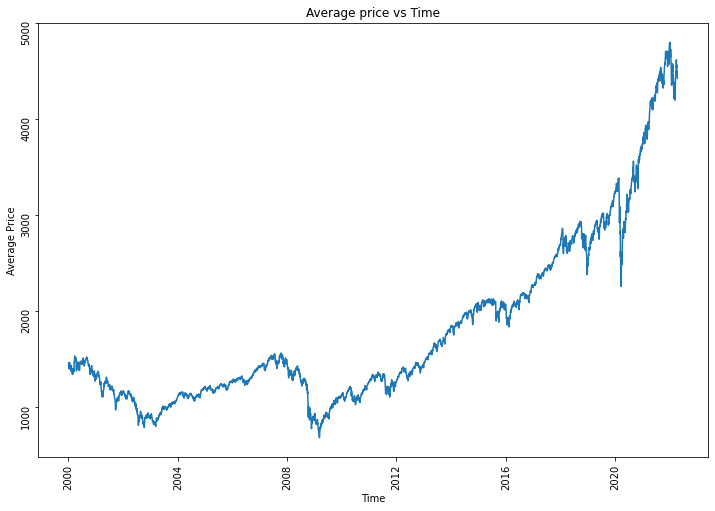

In [ ]:
#plotting data by date
data['dcp_date_current_period'] = pd.to_datetime(df['dcp_date_current_period'])

plt.figure(figsize=(12,8))

plt.plot(data['dcp_date_current_period'],avg_price_curr) # Time vs Average Price
plt.title('Average price vs Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.savefig("original.png")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          5604 non-null   int64         
 1   uuid                                        0 non-null      float64       
 2   dcp_date_current_period                     5604 non-null   datetime64[ns]
 3   opcp_open_price_current_period              5604 non-null   object        
 4   hpcp_high_price_current_period              5604 non-null   object        
 5   lpcp_low_price_current_period               5604 non-null   object        
 6   cpcp_close_price_current_period             5604 non-null   object        
 7   acpcp_adjusted_close_price_current_period   5604 non-null   object        
 8   vtcp_volume_of_transactions_current_period  5604 non-null   object        
 9   apcp_ave

#### **Calculating day_number_current_period**

In [ ]:
from datetime import timedelta

In [ ]:
def datetime_to_int(day):
  return float(day.days)

In [ ]:
# Add the 'day_number_current_period' column
data['dncp_day_number_current_period'] = data['dcp_date_current_period'] - data['dcp_date_current_period'][0]
data['dncp_day_number_current_period'] = data['dncp_day_number_current_period'] + timedelta(days=36528)
data['dncp_day_number_current_period'] = data['dncp_day_number_current_period'].apply(datetime_to_int)
days_in_number = data['dncp_day_number_current_period']
days_in_number

0       36528.0
1       36529.0
2       36530.0
3       36531.0
4       36532.0
         ...   
5599    44657.0
5600    44658.0
5601    44659.0
5602    44662.0
5603    44663.0
Name: dncp_day_number_current_period, Length: 5604, dtype: float64

In [ ]:
data

,id,uuid,dcp_date_current_period,opcp_open_price_current_period,hpcp_high_price_current_period,lpcp_low_price_current_period,cpcp_close_price_current_period,acpcp_adjusted_close_price_current_period,vtcp_volume_of_transactions_current_period,apcp_average_price_current_period,apn10p_average_price_next_10_periods,dncp_day_number_current_period
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000",1460.2075,1434.34275,36528.0
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000",1426.8225,1437.18825,36529.0
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000",1398.1200,1442.51925,36530.0
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000",1402.3900,1446.77300,36531.0
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000",1421.7800,1446.90500,36532.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5599,5600,NaN,2022-04-06,"4,494.17","4,503.94","4,450.04","4,481.15","4,481.15","4,137,080,000",4482.3250,NaN,44657.0
5600,5601,NaN,2022-04-07,"4,474.65","4,521.16","4,450.30","4,500.21","4,500.21","4,054,010,000",4486.5800,NaN,44658.0
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000",4494.3600,NaN,44659.0
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000",4436.9750,NaN,44662.0


#### **Creating sliding window**

In [ ]:
# Each window slides from 1-10, 2-11, 3-12, ...
def window(interval, type='last', window_size = 10):
  windows = []
  if type == 'next':
    for i in range(len(interval)-window_size+1):  # 60-10+1 = 51 i=50
      windows.append(list(interval[i:i+window_size])) # x[50:60]

  elif type == 'last':
    for i in range(window_size-1,len(interval)):
      windows.append(list(interval[i-window_size+1:i+1]))

  return windows

### **Creating Fourier and Reversed Fourier function**



In [ ]:
# Creating Fourier Function
def make_func(numarg):
    def func(x,*a):
        n= int((numarg + 1)/2)
        s= 0
        for i in range(n):
          if i == 0:
            s = a[i]/2
          else:
            s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
        return s
    return func

# Creating Reversed Fourier Function
def reversed_func(x,*a):
  n= int((len(a) + 1)/2)
  s= 0
  for i in range(n):
    if i == 0:
      s = a[i]/2
    else:
      s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
  return s

#### **AVERAGE PRICE LAST 10 PERIODS**

In [ ]:
# Finding last 10 days price windows for the whole data
window_last_10_days_avg_price = window(avg_price_curr[:])
print(len(window_last_10_days_avg_price))

# Finding last 10 days day_number windows for the whole data
window_last_10_days = window(days_in_number[:])
print(len(window_last_10_days))

5595
5595


$$a[i]\times \cos(i\times x) + a[i+n-1]\times sin(i \times x)$$

$$\sqrt{\sum(predictions-targets)^2/n}$$



In [ ]:
window_size = 10

In [ ]:
# 3_degree
a = np.ones(7)
params_3degree = []
for i in range(len(window_last_10_days)):
  params_3degree.append(curve_fit(make_func(len(a)), window_last_10_days[i], window_last_10_days_avg_price[i], a)[0])

y_fit_3degree = []
for i in range(len(window_last_10_days)):
  y_fit_3degree.append(reversed_func(days_in_number[i+window_size-1],*params_3degree[i]))

params_3degree = np.array(params_3degree)
y_fit_3degree = np.array(y_fit_3degree)

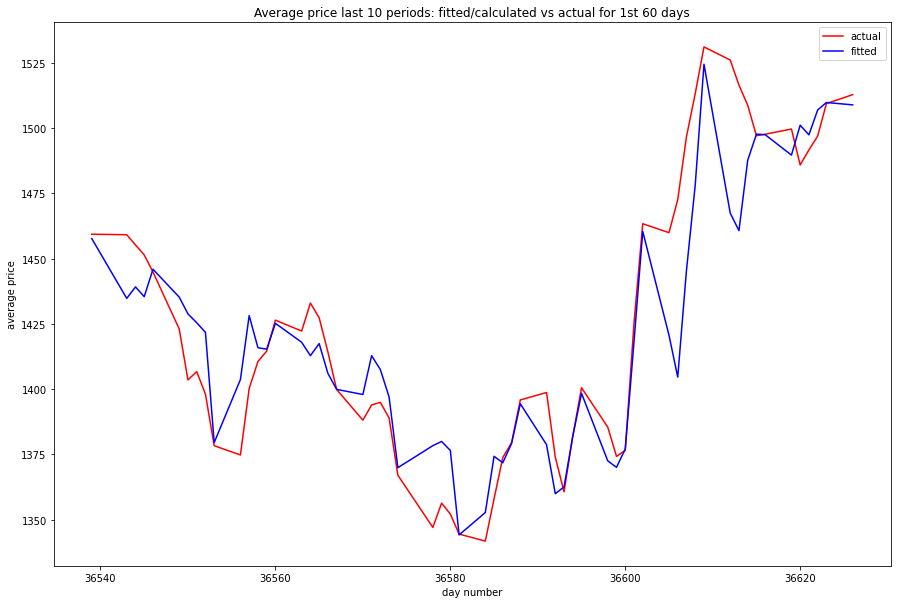

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price last 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_curr[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_3degree[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

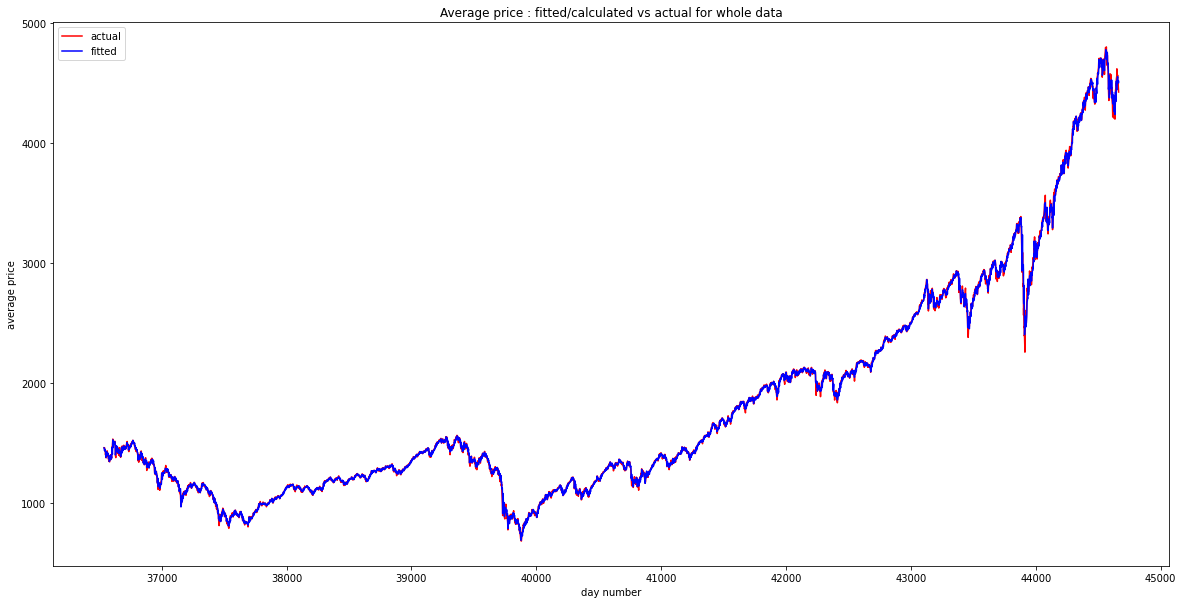

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], avg_price_curr[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_3degree[:], 'b-', label='fitted')
plt.xlabel('day number')
# plt.xlim(1000, 5000)
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for 3 degree fitting : {}'.format(mean_absolute_error(avg_price_curr[9:], y_fit_3degree)))
print('r2 score for 3 degree fitting : {}'.format(r2_score(avg_price_curr[9:], y_fit_3degree)))

mae for 3 degree fitting : 12.688335360421839
r2 score for 3 degree fitting : 0.9994158612059499


In [ ]:
params_3degree[0]

array([ 2.88770002e+03, -3.12413307e+01,  7.91747852e+00, -8.16648622e+00,
       -2.24193014e+00, -2.21199213e+00,  2.52607592e+00])

In [ ]:
y_fit_3degree[:10]

array([1457.72471384, 1434.79535782, 1439.19649577, 1435.45524832,
       1445.95348482, 1435.28102269, 1428.86573886, 1425.47642244,
       1421.79372685, 1379.550232  ])

In [ ]:
avg = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), np.around(y_fit_3degree, decimals=2))))
avg

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
5599    4508.76
5600    4507.22
5601    4498.25
5602    4515.87
5603    4501.54
Length: 5604, dtype: float64

In [ ]:
days_in_number

0       36528.0
1       36529.0
2       36530.0
3       36531.0
4       36532.0
         ...   
5599    44657.0
5600    44658.0
5601    44659.0
5602    44662.0
5603    44663.0
Name: dncp_day_number_current_period, Length: 5604, dtype: float64

In [ ]:
avg_price = {'DNCP_day_number_current_period': days_in_number, 'CAPCPW3DFF_calculated_average_price_current_period_with_3_degrees_fourier_function': avg}

In [ ]:
pd.DataFrame(avg_price).to_excel('calculated_avg_price.xlsx')

In [ ]:
a = np.array(params_3degree)
a0 = []
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
for i in range(len(params_3degree)):
  a0.append(params_3degree[i][0])
  a1.append(params_3degree[i][1])
  a2.append(params_3degree[i][2])
  a3.append(params_3degree[i][3])
  a4.append(params_3degree[i][4])
  a5.append(params_3degree[i][5])
  a6.append(params_3degree[i][6])
a0 = np.array(a0).reshape(-1)
a1 = np.array(a1).reshape(-1)
a2 = np.array(a2).reshape(-1)
a3 = np.array(a3).reshape(-1)
a4 = np.array(a4).reshape(-1)
a5 = np.array(a5).reshape(-1)
a6 = np.array(a6).reshape(-1)

In [ ]:
# storing the Fourier function parameters
data1 = {'A0FFP_a0_fourier_function_parameter_next_10_periods': a0, 'A1FFP_a1_fourier_function_parameter_next_10_periods': a1,'A2FFP_a2_fourier_function_parameter_next_10_periods': a2, 'A3FFP_a3_fourier_function_parameter_next_10_periods': a3,'B1FFP_b1_fourier_function_parameter': a4, 'B2FFP_b2_fourier_function_parameter': a5,'B3FFP_b3_fourier_function_parameter': a6}
coef_result = pd.DataFrame(data = data1)

In [ ]:
coef_result

,A0FFP_a0_fourier_function_parameter_next_10_periods,A1FFP_a1_fourier_function_parameter_next_10_periods,A2FFP_a2_fourier_function_parameter_next_10_periods,A3FFP_a3_fourier_function_parameter_next_10_periods,B1FFP_b1_fourier_function_parameter,B2FFP_b2_fourier_function_parameter,B3FFP_b3_fourier_function_parameter
0,2887.700019,-31.241331,7.917479,-8.166486,-2.241930,-2.211992,2.526076
1,2907.909132,-41.001803,18.197025,3.569021,-10.433010,10.613649,-8.099793
2,2947.024326,-70.292132,39.677204,-13.462217,-16.321110,24.660737,-12.973244
3,3034.248771,-136.580008,90.907408,-17.579227,-37.968816,55.421176,-51.860145
4,2886.786611,9.258122,-3.516556,-4.195700,3.387972,-13.653568,15.961377
...,...,...,...,...,...,...,...
5590,9125.828934,29.367618,-17.740979,-34.312090,-9.703604,6.806278,3.996619
5591,9195.576540,37.325906,-76.702107,-28.751340,-69.579448,-6.231764,32.938732
5592,9080.525131,26.593153,0.811851,-5.607560,34.169323,10.213662,-3.579947
5593,9022.093658,-0.164392,28.001251,60.300943,60.298615,31.843136,-8.754320


In [ ]:
coef_result.to_excel("proceedit 20220517 Data - S&P500 - Fourier function parameters 2020 - 2021.xlsx")

#### **VOLUME LAST 10 PERIODS**

In [ ]:
volume

0       9.318000e+08
1       1.009000e+09
2       1.085500e+09
3       1.092300e+09
4       1.225200e+09
            ...     
5599    4.137080e+09
5600    4.054010e+09
5601    3.453040e+09
5602    3.452540e+09
5603    3.451990e+09
Name: vtcp_volume_of_transactions_current_period, Length: 5604, dtype: float64

In [ ]:
volume_log = volume.apply(np.log10)
volume_log

0       8.969323
1       9.003891
2       9.035630
3       9.038342
4       9.088207
          ...   
5599    9.616694
5600    9.607885
5601    9.538202
5602    9.538139
5603    9.538070
Name: vtcp_volume_of_transactions_current_period, Length: 5604, dtype: float64

In [ ]:
scaler = RobustScaler()
volume_log_scaled = scaler.fit_transform(np.array(volume_log).reshape(-1,1))
volume_log_scaled = volume_log_scaled.reshape(-1)
volume_log_scaled

array([-1.67325907, -1.56817206, -1.47168755, ...,  0.05611449,
        0.05592331,  0.05571297])

In [ ]:
# Finding last 10 days volume windows for the whole data
window_last_10_days_volume = window(volume[:])
print(len(window_last_10_days_volume))

5595


In [ ]:
# 3_degree
b = np.full(7, 1e7)
params_3degree_vol = []
for i in range(len(window_last_10_days)):
  params_3degree_vol.append(curve_fit(make_func(len(b)), window_last_10_days[i], window_last_10_days_volume[i], b)[0])

y_fit_3degree_vol = []
for i in range(len(window_last_10_days)):
  y_fit_3degree_vol.append(reversed_func(days_in_number[i+window_size-1],*params_3degree_vol[i]))

params_3degree_vol = np.array(params_3degree_vol)
y_fit_3degree_vol = np.array(y_fit_3degree_vol)

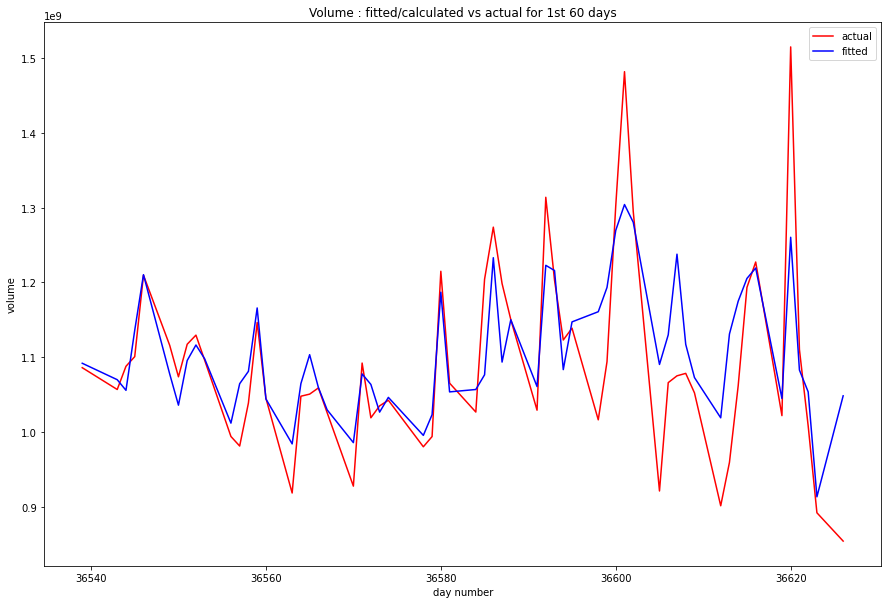

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Volume : fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], volume[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_3degree_vol[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

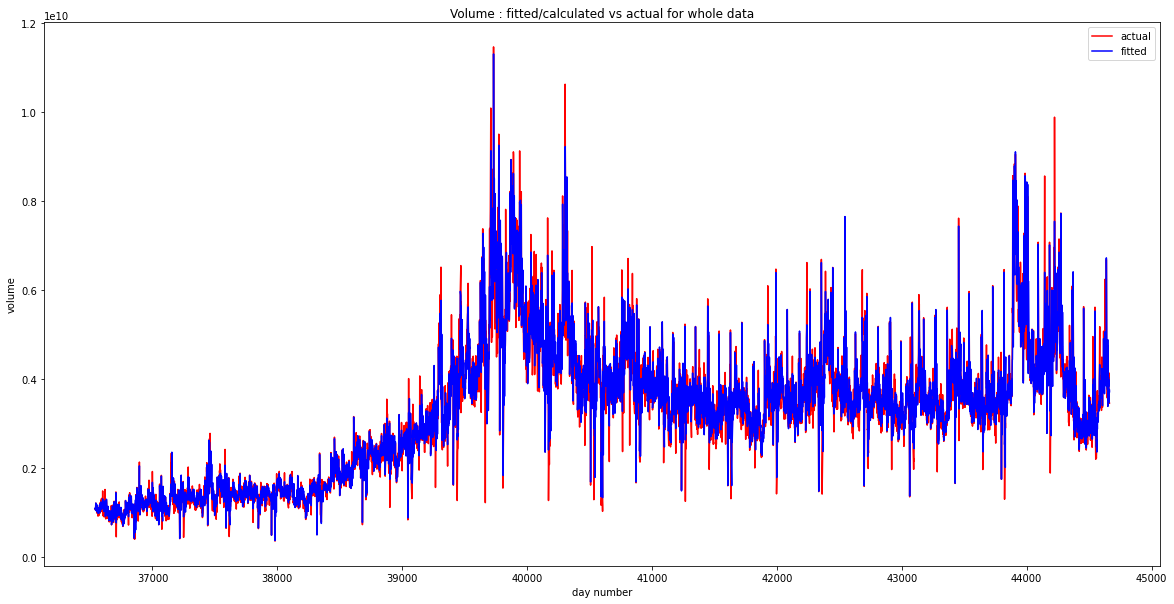

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Volume : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], volume[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_3degree_vol[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

In [ ]:
# Error metrics : r2 score
print('mae for 3 degree fitting: {}'.format(mean_absolute_error(volume[9:], y_fit_3degree_vol)))
print('r2 score for 3 degree fitting: {}'.format(r2_score(volume[9:], y_fit_3degree_vol)))

mae for 3 degree fitting: 214571033.05331478
r2 score for 3 degree fitting: 0.9459677150450365


In [ ]:
params_3degree_vol[0]

array([ 2.01165400e+09,  8.95251075e+07, -1.04623397e+08,  9.23607053e+07,
        4.87347491e+07, -2.40207046e+07, -2.26940053e+07])

In [ ]:
y_fit_3degree_vol[0]

1091836135.081743

In [ ]:
y_fit_3degree_vol = np.floor(y_fit_3degree_vol)

In [ ]:
y_fit_3degree_vol[0]

1091836135.0

In [ ]:
vol = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), y_fit_3degree_vol)))
vol

0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
5599    3.981950e+09
5600    3.764212e+09
5601    3.471395e+09
5602    3.760941e+09
5603    3.709909e+09
Length: 5604, dtype: float64

In [ ]:
vol_data = {'DNCP_day_number_current_period': days_in_number, 'calculated_volume_current_period_with_3_degrees_fourier_function': vol}

In [ ]:
pd.DataFrame(vol_data).to_csv('calculated_volume.csv')

In [ ]:
a_v = np.array(params_3degree_vol)
a0_v = []
a1_v = []
a2_v = []
a3_v = []
a4_v = []
a5_v= []
a6_v = []
for i in range(len(params_3degree_vol)):
  a0_v.append(params_3degree_vol[i][0])
  a1_v.append(params_3degree_vol[i][1])
  a2_v.append(params_3degree_vol[i][2])
  a3_v.append(params_3degree_vol[i][3])
  a4_v.append(params_3degree_vol[i][4])
  a5_v.append(params_3degree_vol[i][5])
  a6_v.append(params_3degree_vol[i][6])
a0_v = np.array(a0_v).reshape(-1)
a1_v = np.array(a1_v).reshape(-1)
a2_v = np.array(a2_v).reshape(-1)
a3_v = np.array(a3_v).reshape(-1)
a4_v = np.array(a4_v).reshape(-1)
a5_v = np.array(a5_v).reshape(-1)
a6_v = np.array(a6_v).reshape(-1)

In [ ]:
# storing the Fourier function parameters
data2 = {'A0FFPVTL10P_a0_fourier_function_parameter_volume_of_transactions_last_10_periods': a0_v,
         'A1FFPVTL10P_a1_fourier_function_parameter_volume_of_transactions_last_10_periods': a1_v,
         'A2FFPVTL10P_a2_fourier_function_parameter_volume_of_transactions_last_10_periods': a2_v,
         'A3FFPVTL10P_a3_fourier_function_parameter_volume_of_transactions_last_10_periods': a3_v,
         'B1FFPVTL10P_b1_fourier_function_parameter_volume_of_transactions_last_10_periods': a4_v,
         'B2FFPVTL10P_b2_fourier_function_parameter_volume_of_transactions_last_10_periods': a5_v,
         'B3FFPVTL10P_b3_fourier_function_parameter_volume_of_transactions_last_10_periods': a6_v}
coef_result_vol = pd.DataFrame(data = data2)

In [ ]:
coef_result_vol

,A0FFPVTL10P_a0_fourier_function_parameter_volume_of_transactions_last_10_periods,A1FFPVTL10P_a1_fourier_function_parameter_volume_of_transactions_last_10_periods,A2FFPVTL10P_a2_fourier_function_parameter_volume_of_transactions_last_10_periods,A3FFPVTL10P_a3_fourier_function_parameter_volume_of_transactions_last_10_periods,B1FFPVTL10P_b1_fourier_function_parameter_volume_of_transactions_last_10_periods,B2FFPVTL10P_b2_fourier_function_parameter_volume_of_transactions_last_10_periods,B3FFPVTL10P_b3_fourier_function_parameter_volume_of_transactions_last_10_periods
0,2.011654e+09,8.952511e+07,-1.046234e+08,9.236071e+07,4.873475e+07,-2.402070e+07,-2.269401e+07
1,2.024998e+09,7.340903e+07,-9.610311e+07,7.965160e+07,4.675308e+07,-2.103690e+07,-2.272757e+07
2,1.968923e+09,1.452121e+08,-1.455949e+08,7.055452e+07,6.587012e+07,-6.018470e+07,1.496315e+07
3,2.054615e+09,4.582580e+07,-7.641405e+07,3.688229e+07,3.926589e+07,-6.038565e+06,-4.429177e+06
4,2.241928e+09,-1.492679e+08,4.378677e+07,2.807658e+07,-2.151388e+07,8.733796e+07,-1.079371e+08
...,...,...,...,...,...,...,...
5590,9.895549e+09,2.871882e+08,-1.687298e+09,-3.228725e+08,-2.025277e+09,-2.376962e+08,9.079046e+08
5591,8.268150e+09,1.232557e+07,-4.112078e+08,-4.583799e+07,-4.587874e+08,7.174192e+07,2.664831e+08
5592,7.585777e+09,-5.104799e+07,1.486539e+08,-1.010123e+08,2.139211e+08,8.061945e+07,3.633178e+07
5593,6.684208e+09,-6.190625e+08,1.836929e+08,3.193365e+08,7.279071e+08,6.373428e+08,1.913408e+08


In [ ]:
coef_result_vol.to_excel("proceedit 20220517 Data - S&P500 - Fourier function parameters (vol) 2020 - 2021.xlsx")

## **Average price next 10 periods**

In [ ]:
len(avg_price_next)

5594

In [ ]:
len(days_in_number)

5604

In [ ]:
# Finding next 10 days price windows for the whole data
window_next_10_days_avg_price = window(avg_price_next[:])
print(len(window_next_10_days_avg_price))

# Finding last 10 days day_number windows for the whole data
window_next_10_days = window(days_in_number[:-10])
print(len(window_next_10_days))

5585
5585


In [ ]:
# 3_degree
a_next = np.full(7, 10)
params_3degree_next = []
for i in range(len(window_next_10_days)):
  params_3degree_next.append(curve_fit(make_func(len(a_next)), window_next_10_days[i], window_next_10_days_avg_price[i], a_next)[0])

y_fit_3degree_next = []
for i in range(len(window_next_10_days)):
  y_fit_3degree_next.append(reversed_func(days_in_number[i+window_size-1],*params_3degree_next[i]))

params_3degree_next = np.array(params_3degree_next)
y_fit_3degree_next = np.array(y_fit_3degree_next)

In [ ]:
y_fit_3degree_next[0]

1420.7792811632316

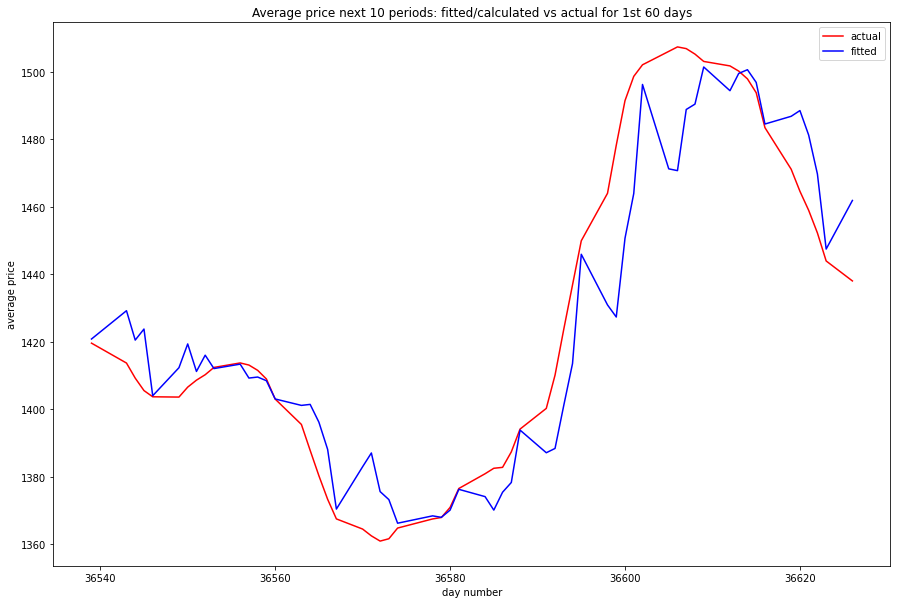

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_next[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_3degree_next[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
y_fit_3degree_next[-1]

2290.997537148135

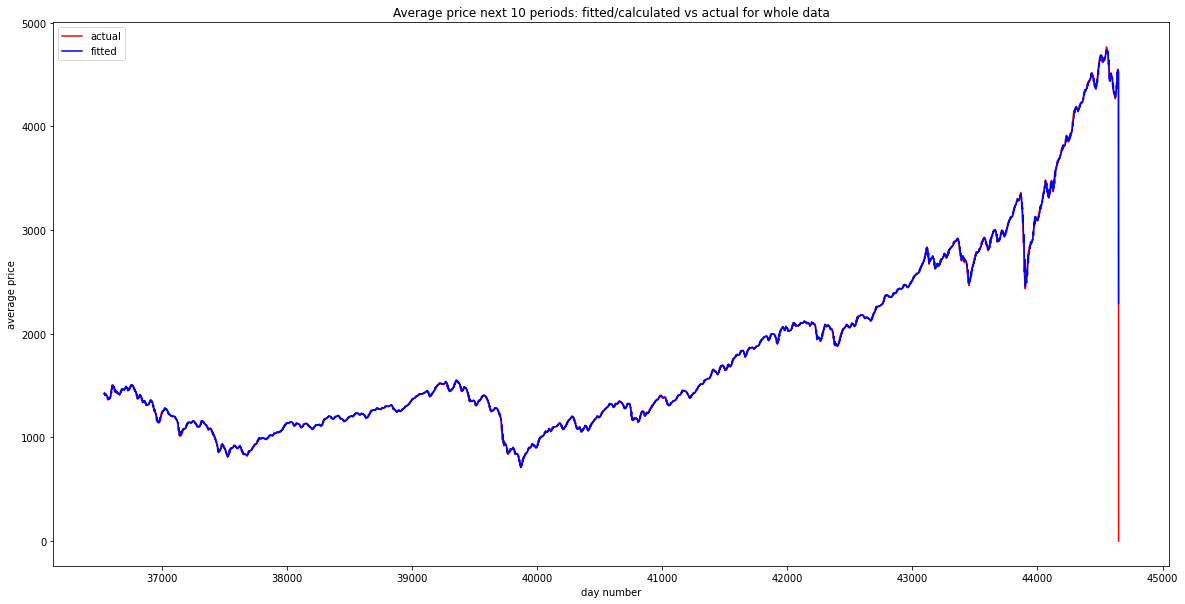

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[9:],'r-', label='actual')
plt.plot(days_in_number[9:-10], y_fit_3degree_next[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : r2 score
print('r2 score for 3 degree fitting : {}'.format(r2_score(avg_price_next[9:], y_fit_3degree_next)))

r2 score for 3 degree fitting : 0.9985036781449325


In [ ]:
params_3degree_next[0]

array([2862.84012614,   13.77351172,   -8.28060234,    7.7363066 ,
         -3.87116   ,    4.79302272,   -3.67429688])

In [ ]:
y_fit_3degree_next[:10]

array([1420.77928116, 1429.16088885, 1420.46457082, 1423.72859561,
       1403.98180557, 1412.28267944, 1419.32335606, 1411.17472233,
       1415.98871289, 1412.02802371])

In [ ]:
avg_next = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), np.around(y_fit_3degree_next, decimals=2))))
avg_next

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
5589    4502.22
5590    4507.11
5591    4540.88
5592    4515.83
5593    2291.00
Length: 5594, dtype: float64

In [ ]:
avg_price_next_data = {'DNCP_day_number_current_period': days_in_number, 'CAPN10PW3DFF_calculated_average_price_next_10_periods_with_3_degrees_fourier_function': avg_next}

In [ ]:
pd.DataFrame(avg_price_next_data).to_excel('calculated_avg_price_next_10_periods.xlsx')

In [ ]:
an = np.array(params_3degree_next)
a0n = []
a1n = []
a2n = []
a3n = []
a4n = []
a5n = []
a6n = []
for i in range(len(params_3degree_next)):
  a0n.append(params_3degree_next[i][0])
  a1n.append(params_3degree_next[i][1])
  a2n.append(params_3degree_next[i][2])
  a3n.append(params_3degree_next[i][3])
  a4n.append(params_3degree_next[i][4])
  a5n.append(params_3degree_next[i][5])
  a6n.append(params_3degree_next[i][6])
a0n = np.array(a0n).reshape(-1)
a1n = np.array(a1n).reshape(-1)
a2n = np.array(a2n).reshape(-1)
a3n = np.array(a3n).reshape(-1)
a4n = np.array(a4n).reshape(-1)
a5n = np.array(a5n).reshape(-1)
a6n = np.array(a6n).reshape(-1)

In [ ]:
# storing the Fourier function parameters
data3 = {'A0FFPAPN10P_a0_fourier_function_parameter_average_price_next_10_periods': a0n,
         'A1FFPAPN10P_a1_fourier_function_parameter_average_price_next_10_periods': a1n,
         'A2FFPAPN10P_a2_fourier_function_parameter_average_price_next_10_periods': a2n,
         'A3FFPAPN10P_a3_fourier_function_parameter_average_price_next_10_periods': a3n,
         'B1FFPAPN10P_b1_fourier_function_parameter_average_price_next_10_periods': a4n,
         'B2FFPAPN10P_b2_fourier_function_parameter_average_price_next_10_periods': a5n,
         'B3FFPAPN10P_b3_fourier_function_parameter_average_price_next_10_periods': a6n}
coef_result_next = pd.DataFrame(data = data3)

In [ ]:
coef_result_next.to_excel("proceedit 20220517 Data - S&P500 - Fourier function parameters (next) 2020 - 2021.xlsx")

### **Creating Model**

In [ ]:
# normalize the calculated Fourier parameters to be passed as input
scaler = RobustScaler()
normalized_params_3degree = scaler.fit_transform(params_3degree)
normalized_params_3degree.shape

(5595, 7)

In [ ]:
normalized_params_3degree[0]

array([ 0.02664426, -0.8753863 ,  0.29018028, -0.42803865, -0.06554981,
       -0.05346948,  0.10887545])

In [ ]:
normalized_params_3degree_vol = scaler.fit_transform(params_3degree_vol)
normalized_params_3degree_vol.shape

(5595, 7)

In [ ]:
normalized_params_3degree_vol[0]

array([-0.91549859,  0.11891771, -0.14580172,  0.2163307 ,  0.07157726,
       -0.03403714, -0.04932042])

In [ ]:
normalized_params_3degree_next = scaler.fit_transform(params_3degree_next)
normalized_params_3degree_next.shape

(5585, 7)

In [ ]:
normalized_params_3degree_next[0]

array([ 0.01733387,  0.62767082, -0.4508491 ,  0.67812014, -0.17134412,
        0.25672295, -0.3239236 ])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
avg_price_params_last = keras.Input(shape=(7,), name="avg_price_params_last")
vol_params_last = keras.Input(shape=(7,), name="vol_params_last")

## MODEL 1 : ANN with Dense Layers only



In [ ]:
inputs = layers.concatenate([avg_price_params_last, vol_params_last])
x = layers.Dense(7)(inputs)
outputs = layers.Dropout(0.2)(x)

In [ ]:
model1 = keras.Model(inputs = [avg_price_params_last, vol_params_last], outputs = outputs)

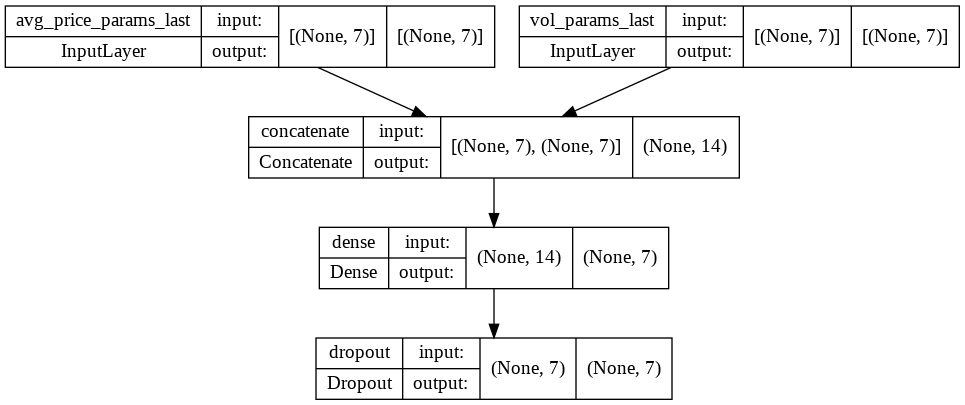

In [ ]:
keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate=5e-3),
              loss=keras.losses.MeanAbsoluteError(),
              )

In [ ]:
params_3degree_next.shape

(5585, 7)

In [ ]:
np.any(np.isnan(normalized_params_3degree_next))

False

In [ ]:
avg_price_train = normalized_params_3degree[:-1010]
avg_price_test = normalized_params_3degree[-1010:-10]
vol_train = normalized_params_3degree_vol[:-1010]
vol_test = normalized_params_3degree_vol[-1010:-10]
avg_price_next_train = normalized_params_3degree_next[:-1000]
avg_price_next_test = normalized_params_3degree_next[-1000:]

In [ ]:
history1 = model1.fit(
    {"avg_price_params_last": avg_price_train, "vol_params_last": vol_train},
    avg_price_next_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    shuffle = False
)

Epoch 1/30
29/29 [==============================] - 2s 23ms/step - loss: 1.2377 - val_loss: 1.3874
Epoch 2/30
29/29 [==============================] - 0s 5ms/step - loss: 1.0195 - val_loss: 1.1900
Epoch 3/30
29/29 [==============================] - 0s 6ms/step - loss: 0.8612 - val_loss: 1.0494
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.7471 - val_loss: 0.9602
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.6860 - val_loss: 0.9157
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 0.8967
Epoch 7/30
29/29 [==============================] - 0s 7ms/step - loss: 0.6696 - val_loss: 0.8890
Epoch 8/30
29/29 [==============================] - 0s 6ms/step - loss: 0.6679 - val_loss: 0.8917
Epoch 9/30
29/29 [==============================] - 0s 8ms/step - loss: 0.6672 - val_loss: 0.8896
Epoch 10/30
29/29 [==============================] - 0s 4ms/step - loss: 0.6670 - val_loss: 0.8894
Epoch 11/30
29/29 

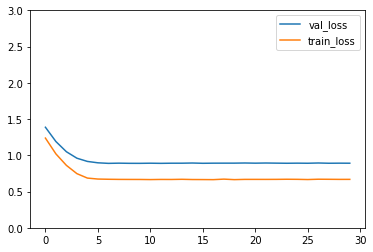

In [ ]:
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['loss'], label='train_loss')
plt.ylim(0,3)
plt.legend()

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 avg_price_params_last (InputLa  [(None, 7)]         0           []                               
 yer)                                                                                             
                                                                                                  
 vol_params_last (InputLayer)   [(None, 7)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 14)           0           ['avg_price_params_last[0][0]',  
                                                                  'vol_params_last[0][0]']        
                                                                                              

**TEST DATA (Last 1000 days)**

In [ ]:
pred_test = model1.predict({"avg_price_params_last": avg_price_test, "vol_params_last": vol_test})
pred_test

array([[ 9.8918575e-01,  8.5627981e-02,  3.0155066e-02, ...,
        -8.7166883e-02,  7.1339659e-02, -2.4909135e-03],
       [ 9.3852216e-01, -1.6586820e+00, -1.6238525e+00, ...,
        -7.1570641e-01, -8.5748440e-01, -6.4408326e-01],
       [ 9.4001162e-01, -1.1895814e+00, -1.2135898e+00, ...,
        -5.5435735e-01, -5.7333076e-01, -4.8749799e-01],
       ...,
       [ 2.4008758e+00, -1.4982839e-01,  5.2983701e-01, ...,
         8.3141875e-01, -3.1627649e-01,  2.9262722e-01],
       [ 2.6505878e+00, -2.5640593e+00, -6.5342319e-01, ...,
        -2.4501250e+00,  2.6689336e+00, -1.8308572e+00],
       [ 2.2289276e+00,  1.3814721e+00,  1.8469685e+00, ...,
         1.9744942e+00, -2.0397558e+00,  3.4113184e-01]], dtype=float32)

In [ ]:
pred_test_final = scaler.inverse_transform(pred_test)

In [ ]:
pred_test_final[0]

array([ 4.7769727e+03,  1.7569108e+00,  4.0891603e-01,  3.4491704e+00,
       -1.9572538e+00,  1.5422827e+00, -4.9425911e-02], dtype=float32)

In [ ]:
y_fit_3degree_next_pred_test = []
for i in range(len(window_next_10_days)-1000, len(window_next_10_days)):
  y_fit_3degree_next_pred_test.append(reversed_func(days_in_number[i+window_size-1],*pred_test_final[i-len(window_next_10_days)+1000]))

y_fit_3degree_next_pred_test = np.array(y_fit_3degree_next_pred_test)

In [ ]:
y_fit_3degree_next_pred_test[0]

2387.811315442292

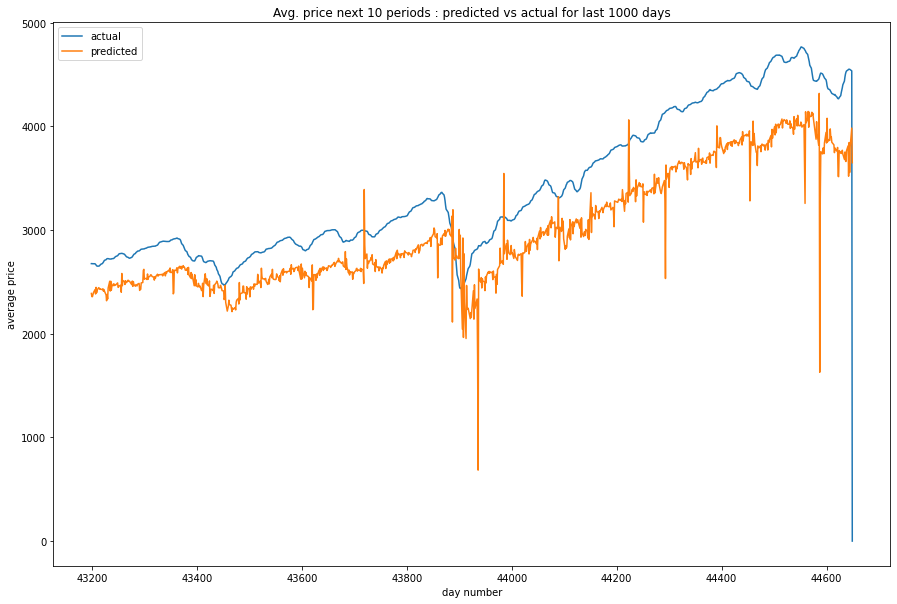

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Avg. price next 10 periods : predicted vs actual for last 1000 days')
plt.plot(days_in_number[-1010:-10], avg_price_next[-1000:], label='actual')
plt.plot(days_in_number[-1010:-10], y_fit_3degree_next_pred_test[:], label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# mae and r2 score between actual and predicted avg price for test data (3 degree)
print("mae for 3 degree : {}".format(mean_absolute_error(avg_price_next[-1000:], y_fit_3degree_next_pred_test)))
print("r2 score for 3 degree : {}".format(r2_score(avg_price_next[-1000:], y_fit_3degree_next_pred_test)))

mae for 3 degree : 427.95292346584444
r2 score for 3 degree : 0.504650637217211


**WHOLE DATA**

In [ ]:
# normalized_params_3degree = normalize(params_3degree, params_3degree[:-1010])
# normalized_params_3degree_vol = normalize(params_3degree_vol, params_3degree_vol[:-1010])

In [ ]:
pred1 = model1.predict({"avg_price_params_last": normalized_params_3degree[:-10], "vol_params_last": normalized_params_3degree_vol[:-10]})
pred1

array([[ 0.02755518, -0.29749122,  0.10192695, ..., -0.05069378,
        -0.01324025, -0.00437085],
       [ 0.03838328, -0.38312158,  0.20881917, ..., -0.09897777,
         0.08445477, -0.15065065],
       [ 0.0628773 , -0.63224643,  0.4208821 , ..., -0.15078929,
         0.23863405, -0.2805892 ],
       ...,
       [ 2.4008758 , -0.14982839,  0.529837  , ...,  0.83141875,
        -0.3162765 ,  0.29262722],
       [ 2.6505878 , -2.5640593 , -0.65342313, ..., -2.450125  ,
         2.6689336 , -1.8308572 ],
       [ 2.2289276 ,  1.3814721 ,  1.8469687 , ...,  1.9744942 ,
        -2.0397558 ,  0.34113187]], dtype=float32)

In [ ]:
# pred1_final = inv_normalize(pred1, params_3degree_next[:-1000])

In [ ]:
pred1_final = scaler.inverse_transform(pred1)

In [ ]:
pred1_final[0]

array([ 2.8829717e+03, -6.7364960e+00,  1.7055017e+00, -1.4266607e+00,
       -1.1279786e+00,  5.9153911e-02, -7.0626430e-02], dtype=float32)

In [ ]:
y_fit_3degree_next_pred1 = []
for i in range(len(window_next_10_days)):
  y_fit_3degree_next_pred1.append(reversed_func(days_in_number[i+window_size-1],*pred1_final[i]))

y_fit_3degree_next_pred1 = np.array(y_fit_3degree_next_pred1)

In [ ]:
y_fit_3degree_next_pred1[0]

1443.4221357863805

In [ ]:
y_fit_3degree_next.shape

(5585,)

In [ ]:
y_fit_3degree_next_pred1.shape

(5585,)

In [ ]:
avg_price_next.shape

(5594,)

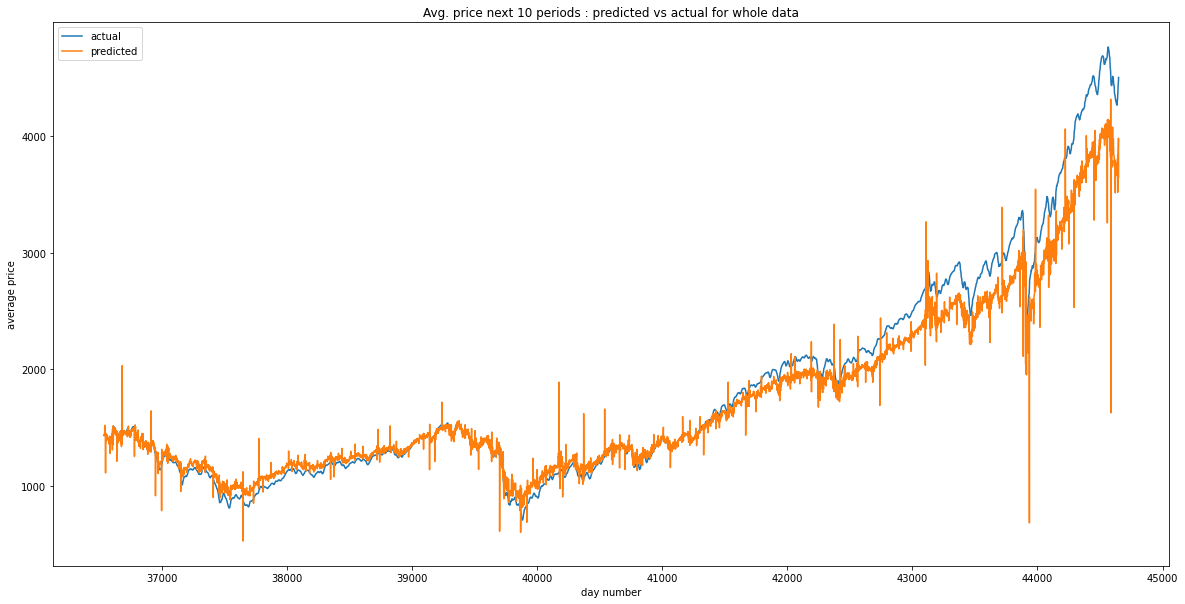

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Avg. price next 10 periods : predicted vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[:-9], label='actual')
plt.plot(days_in_number[9:-10], y_fit_3degree_next_pred1, label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# mae and r2 score between actual and predicted avg price for next 10 days (3 degree)
print("mae for 3 degree : {}".format(mean_absolute_error(avg_price_next[:-9], y_fit_3degree_next_pred1)))
print("r2 score for 3 degree : {}".format(r2_score(avg_price_next[:-9], y_fit_3degree_next_pred1)))

mae for 3 degree : 132.26331217968658
r2 score for 3 degree : 0.9458093269064382


## Expanding to higher degrees

#### **AVERAGE PRICE LAST 10 PERIODS**

In [ ]:
# Creating Fourier Function
def make_func(numarg):
    def func(x,*a):
        n= int((numarg + 1)/2)
        s= 0
        for i in range(n):
          if i == 0:
            s = a[i]/2
          else:
            s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
        return s
    return func

# Creating Reversed Fourier Function
def reversed_func(x,*a):
  n= int((len(a) + 1)/2)
  s= 0
  for i in range(n):
    if i == 0:
      s = a[i]/2
    else:
      s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
  return s

In [ ]:
k = 4

In [ ]:
# k_degree
a = np.zeros(2*k+1)
params_kdegree = []
for i in range(len(window_last_10_days)):
  params_kdegree.append(curve_fit(make_func(len(a)), window_last_10_days[i], window_last_10_days_avg_price[i], a)[0])

y_fit_kdegree = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree.append(reversed_func(days_in_number[i+window_size-1],*params_kdegree[i]))

params_kdegree = np.array(params_kdegree)
y_fit_kdegree = np.array(y_fit_kdegree)

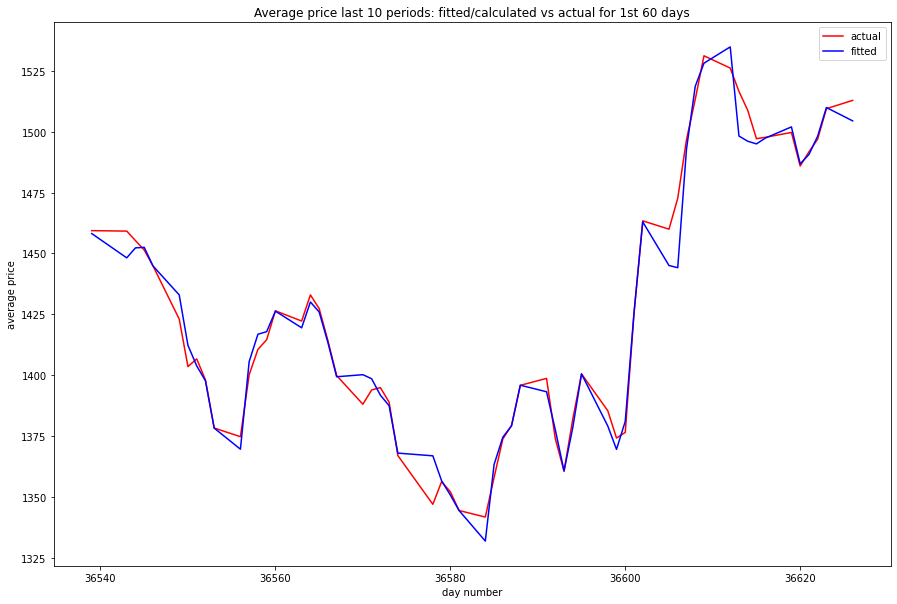

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price last 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_curr[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

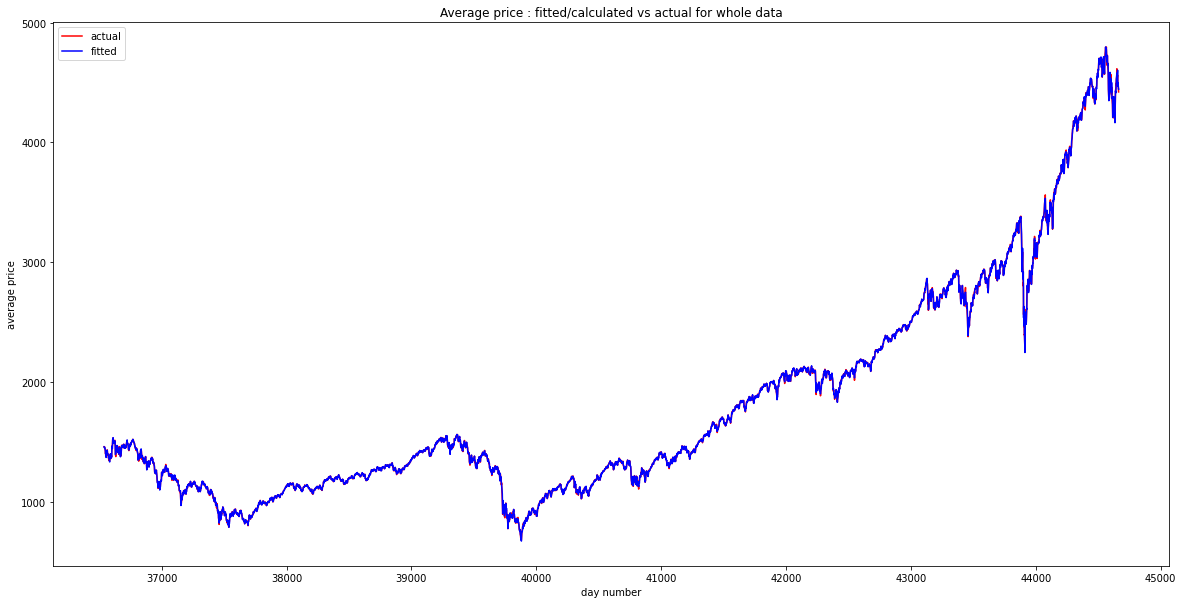

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], avg_price_curr[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : r2 score
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_curr[9:], y_fit_kdegree)))

r2 score for 4 degree fitting : 0.9999243101556418


In [ ]:
params_kdegree[0]

array([ 2.88482806e+03, -2.84430605e+01,  4.88095723e+00, -5.58105766e+00,
       -2.54781172e+00, -2.17434525e+00, -1.09097541e+00,  3.15481234e+00,
       -2.15859786e+00])

In [ ]:
y_fit_kdegree[:10]

array([1458.17953403, 1448.21088242, 1452.30461213, 1452.52357417,
       1444.88096567, 1433.01233099, 1412.29769311, 1403.89175295,
       1397.7559543 , 1378.33486564])

In [ ]:
avg = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), np.around(y_fit_kdegree, decimals=2))))
avg

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
5599    4468.63
5600    4476.92
5601    4496.85
5602    4443.98
5603    4444.27
Length: 5604, dtype: float64

In [ ]:
param_name = 'CAPCPW3DFF_calculated_average_price_current_period_with_{}_degrees_fourier_function'.format(k)

In [ ]:
avg_price = {'DNCP_day_number_current_period': days_in_number, param_name: avg}

In [ ]:
file_name = 'calculated_avg_price_{}_degree.xlsx'.format(k)

In [ ]:
pd.DataFrame(avg_price).to_excel(file_name)


#### **VOLUME LAST 10 PERIODS**

In [ ]:
#k_degree
b = np.full(2*k+1, 1e7)
params_kdegree_vol = []
for i in range(len(window_last_10_days)):
  params_kdegree_vol.append(curve_fit(make_func(len(b)), window_last_10_days[i], window_last_10_days_volume[i], b)[0])

y_fit_kdegree_vol = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree_vol.append(reversed_func(days_in_number[i+window_size-1],*params_kdegree_vol[i]))

params_kdegree_vol = np.array(params_kdegree_vol)
y_fit_kdegree_vol = np.array(y_fit_kdegree_vol)

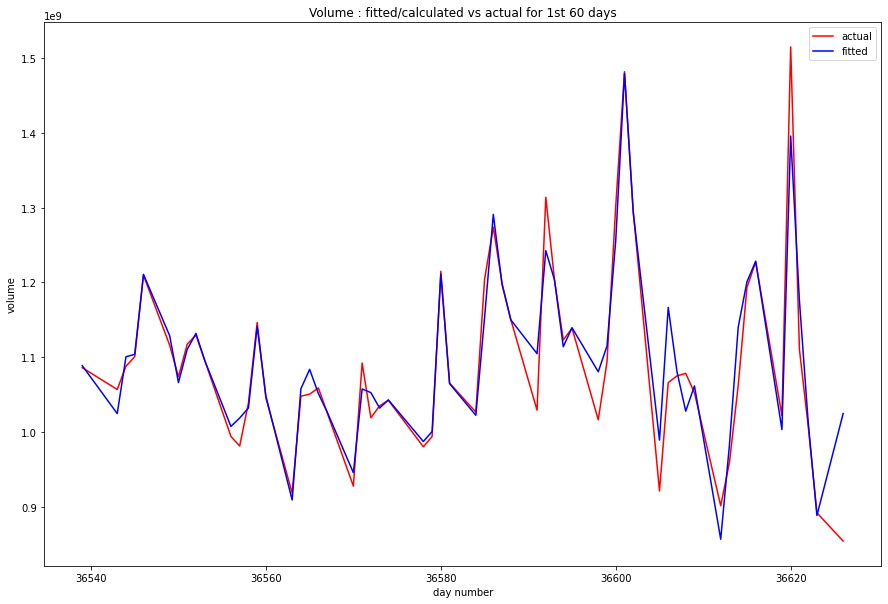

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Volume : fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], volume[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_vol[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

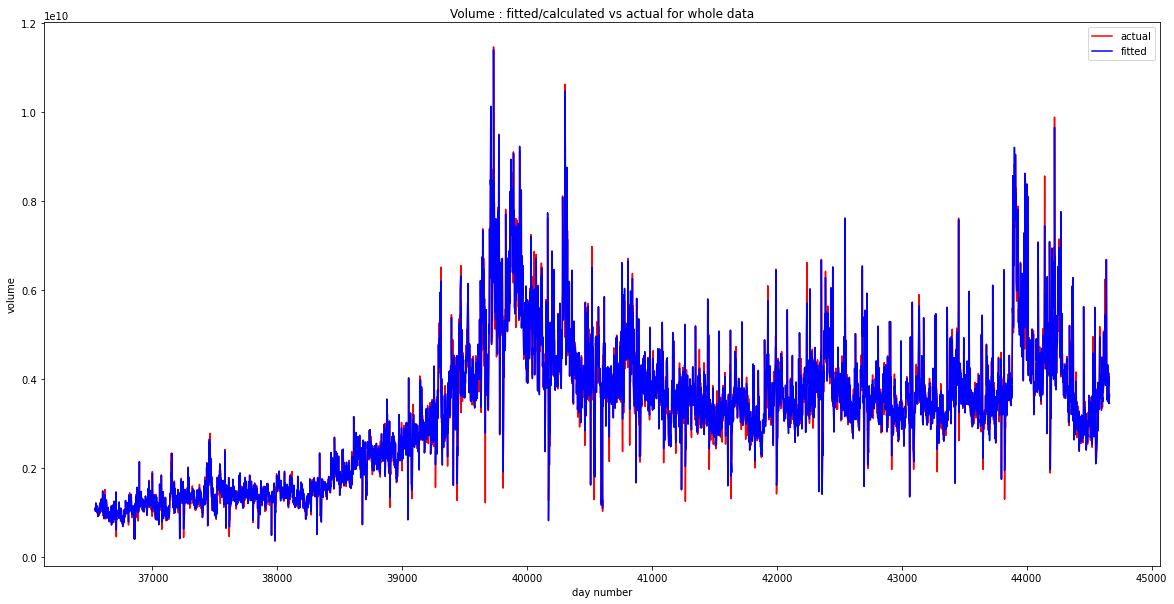

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Volume : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], volume[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree_vol[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

In [ ]:
# Error metrics : r2 score
print('r2 score for {} degree fitting: {}'.format(k, r2_score(volume[9:], y_fit_kdegree_vol)))

r2 score for 4 degree fitting: 0.9879459296950794


In [ ]:
params_kdegree_vol[0]

array([ 1.79223459e+09,  3.01484309e+08, -3.44272750e+08,  2.67064350e+08,
       -1.24629412e+08,  3.13549972e+07,  1.47482419e+07, -6.67612940e+07,
        4.36797439e+07])

In [ ]:
y_fit_kdegree_vol[0]

1088636920.0950522

In [ ]:
y_fit_kdegree_vol = np.floor(y_fit_kdegree_vol)

In [ ]:
y_fit_kdegree_vol[0]

1088636920.0

In [ ]:
vol = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), y_fit_kdegree_vol)))
vol

0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
5599    4.059102e+09
5600    4.059117e+09
5601    3.447139e+09
5602    3.666392e+09
5603    3.607282e+09
Length: 5604, dtype: float64

In [ ]:
param_name = 'calculated_volume_current_period_with_{}_degrees_fourier_function'.format(k)

In [ ]:
vol_data = {'DNCP_day_number_current_period': days_in_number, param_name: vol}

In [ ]:
file_name = 'calculated_volume_{}_degree.csv'.format(k)

In [ ]:
pd.DataFrame(vol_data).to_csv(file_name)

**AVERAGE PRICE NEXT 10 PERIODS**

In [ ]:
# k_degree
a_next = np.ones(2*k+1)
params_kdegree_next = []
for i in range(len(window_next_10_days)):
  params_kdegree_next.append(curve_fit(make_func(len(a_next)), window_next_10_days[i], window_next_10_days_avg_price[i], a_next)[0])

y_fit_kdegree_next = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next.append(reversed_func(days_in_number[i+window_size-1],*params_kdegree_next[i]))

params_kdegree_next = np.array(params_kdegree_next)
y_fit_kdegree_next = np.array(y_fit_kdegree_next)

In [ ]:
y_fit_kdegree_next[0]

1419.8461715626597

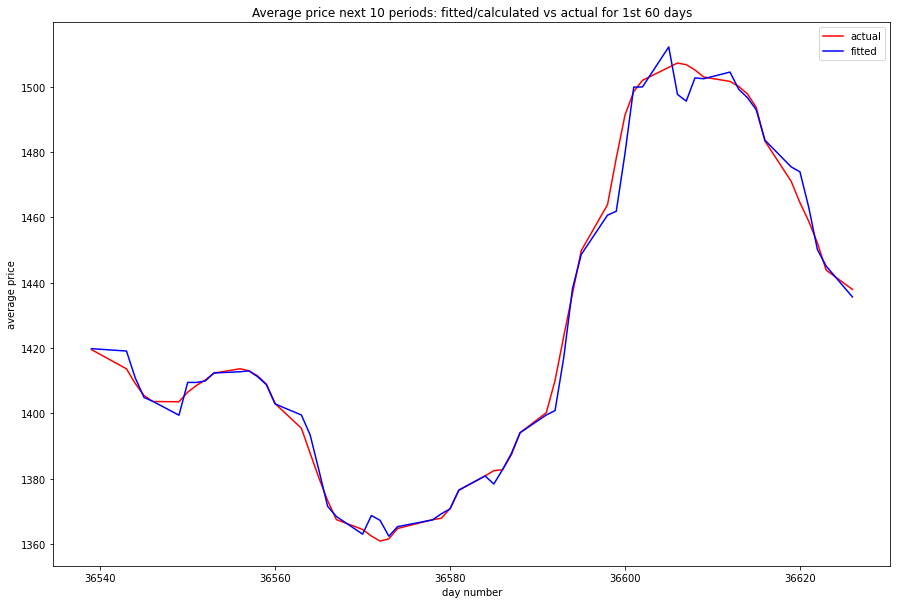

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_next[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_next[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
y_fit_kdegree_next[0]

1419.8461715626597

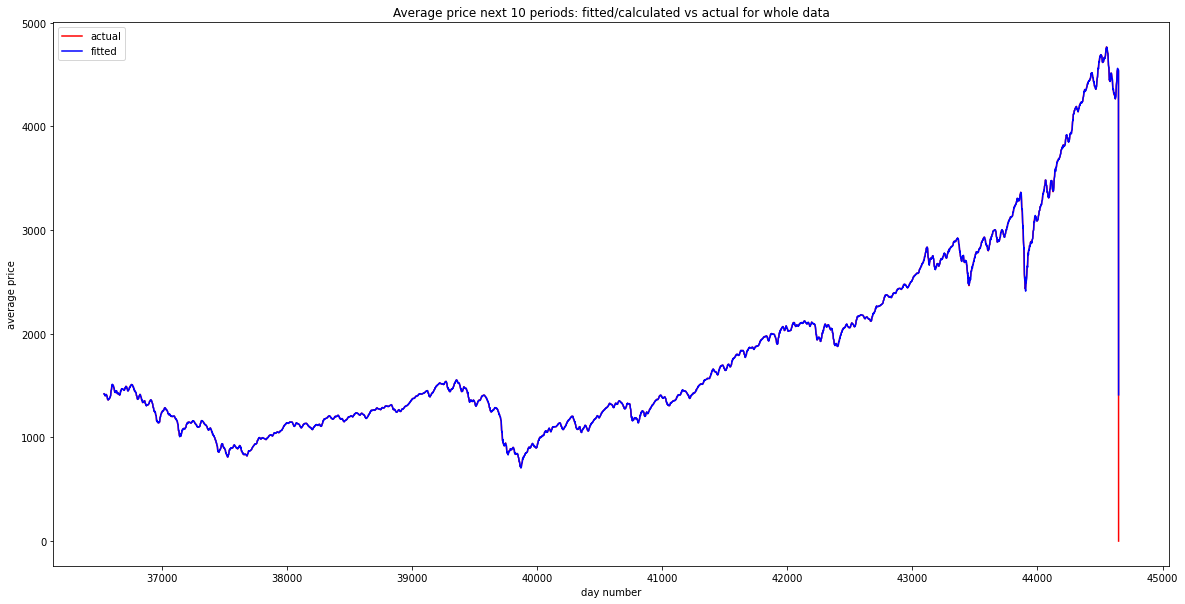

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[9:],'r-', label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : r2 score
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_next[9:], y_fit_kdegree_next)))

r2 score for 4 degree fitting : 0.9995343939674912


In [ ]:
params_kdegree_next[0]

array([2834.39016053,   41.23119918,  -39.4581958 ,   30.07667673,
        -15.20302578,   -6.43253176,    9.17951668,  -10.64608403,
          8.51270309])

In [ ]:
y_fit_kdegree_next[:10]

array([1419.84617156, 1419.11136882, 1410.92178826, 1404.92698748,
       1403.73612911, 1399.47090748, 1409.51478915, 1409.49817783,
       1409.94739382, 1412.4040641 ])

In [ ]:
avg_next = pd.Series(np.concatenate((np.zeros(9, dtype = 'float32'), np.around(y_fit_kdegree_next, decimals=2))))
avg_next

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
5589    4522.11
5590    4543.25
5591    4544.11
5592    4543.37
5593    1410.13
Length: 5594, dtype: float64

In [ ]:
param_name = 'C7APN10PW3DFF_calculated_average_price_next_10_periods_with_{}_degrees_fourier_function'.format(k)

In [ ]:
avg_price_next_data = {'DNCP_day_number_current_period': days_in_number, param_name: avg_next}

In [ ]:
file_name = 'calculated_avg_price_next_10_periods_{}_degree.xlsx'.format(k)

In [ ]:
pd.DataFrame(avg_price_next_data).to_excel(file_name)

**Creating Model**

In [ ]:
# normalize the calculated Fourier parameters to be passed as input
scaler = RobustScaler()
normalized_params_kdegree = scaler.fit_transform(params_kdegree)
normalized_params_kdegree_vol = scaler.fit_transform(params_kdegree_vol)
normalized_params_kdegree_next = scaler.fit_transform(params_kdegree_next)

In [ ]:
normalized_params_kdegree[0]

array([-0.03846905, -0.07686186,  0.01113941, -0.0432999 , -0.01904404,
       -0.00678275, -0.00097019,  0.02025667, -0.02216037])

In [ ]:
normalized_params_kdegree_vol = scaler.fit_transform(params_kdegree_vol)
normalized_params_kdegree_vol.shape

(5595, 9)

In [ ]:
normalized_params_kdegree_vol[0]

array([-0.35851925,  0.05732876, -0.07961743,  0.09617538, -0.10593348,
        0.01711055,  0.00098738, -0.03016947,  0.01885791])

In [ ]:
normalized_params_kdegree_next = scaler.fit_transform(params_kdegree_next)
normalized_params_kdegree_next.shape

(5585, 9)

In [ ]:
normalized_params_kdegree_next[0]

array([-0.0358227 ,  0.17388785, -0.20035162,  0.25165777, -0.3237749 ,
       -0.02667999,  0.04382264, -0.08904318,  0.17474835])

**MODEL : ANN**

In [ ]:
avg_price_params_last = keras.Input(shape=(2*k+1,), name="avg_price_params_last")
vol_params_last = keras.Input(shape=(2*k+1,), name="vol_params_last")
inputs = layers.concatenate([avg_price_params_last, vol_params_last])
outputs = layers.Dense(2*k+1)(inputs)
model1 = keras.Model(inputs = [avg_price_params_last, vol_params_last], outputs = outputs)

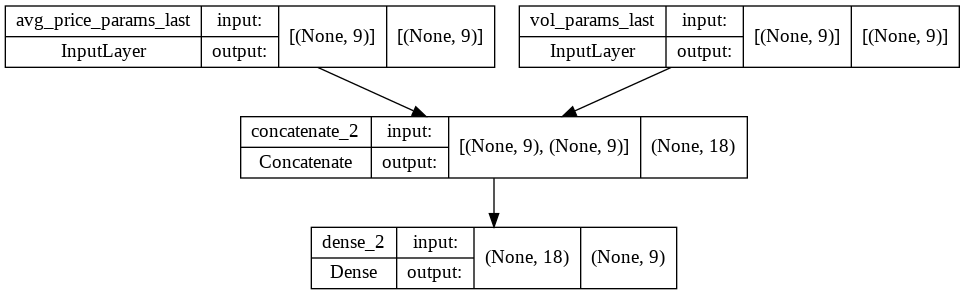

In [ ]:
keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate = 3e-3),
              loss=keras.losses.MeanAbsoluteError(),
              )

In [ ]:
np.any(np.isnan(normalized_params_kdegree_next))

False

**TEST DATA : Last 1000 days**

In [ ]:
normalized_params_kdegree_next.shape

(5585, 9)

In [ ]:
avg_price_train = normalized_params_kdegree[:-1010]
avg_price_test = normalized_params_kdegree[-1010:-10]
vol_train = normalized_params_kdegree_vol[:-1010]
vol_test = normalized_params_kdegree_vol[-1010:-10]
avg_price_next_train = normalized_params_kdegree_next[:-1000]
avg_price_next_test = normalized_params_kdegree_next[-1000:]

In [ ]:
history1 = model1.fit(
    {"avg_price_params_last": avg_price_train, "vol_params_last": vol_train},
    avg_price_next_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    shuffle = False
)

Epoch 1/30
29/29 [==============================] - 0s 6ms/step - loss: 1.4255 - val_loss: 1.6921
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 1.2358 - val_loss: 1.4992
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 1.0799 - val_loss: 1.3414
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 0.9542 - val_loss: 1.2195
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.8561 - val_loss: 1.1309
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.7871 - val_loss: 1.0725
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.7447 - val_loss: 1.0424
Epoch 8/30
29/29 [==============================] - 0s 2ms/step - loss: 0.7244 - val_loss: 1.0293
Epoch 9/30
29/29 [==============================] - 0s 2ms/step - loss: 0.7168 - val_loss: 1.0226
Epoch 10/30
29/29 [==============================] - 0s 3ms/step - loss: 0.7135 - val_loss: 1.0187
Epoch 11/30
29/29 [

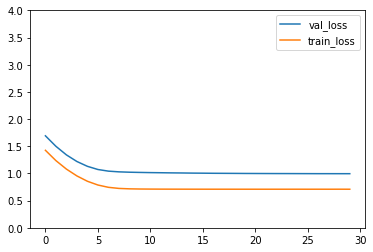

In [ ]:
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['loss'], label='train_loss')
plt.ylim(0,4)
plt.legend()

In [ ]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 avg_price_params_last (InputLa  [(None, 9)]         0           []                               
 yer)                                                                                             
                                                                                                  
 vol_params_last (InputLayer)   [(None, 9)]          0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 18)           0           ['avg_price_params_last[0][0]',  
                                                                  'vol_params_last[0][0]']        
                                                                                            

In [ ]:
pred_test = model1.predict({"avg_price_params_last": avg_price_test, "vol_params_last": vol_test})
pred_test_final = scaler.inverse_transform(pred_test)

In [ ]:
pred_test.shape

(1000, 9)

In [ ]:
pred_test_final[0]

array([ 3.9474343e+03,  4.3734943e+01,  3.1227062e+01,  1.7768953e+01,
        8.7463293e+00,  7.5555115e+00,  6.8488202e+00, -8.9784994e+00,
       -2.6709440e+00], dtype=float32)

In [ ]:
y_fit_kdegree_next_pred_test = []
for i in range(len(window_next_10_days)-1000, len(window_next_10_days)):
  y_fit_kdegree_next_pred_test.append(reversed_func(days_in_number[i+window_size-1],*pred_test_final[i-len(window_next_10_days)+1000]))

y_fit_kdegree_next_pred_test = np.array(y_fit_kdegree_next_pred_test)

In [ ]:
y_fit_kdegree_next_pred_test[0]

1947.6254815596692

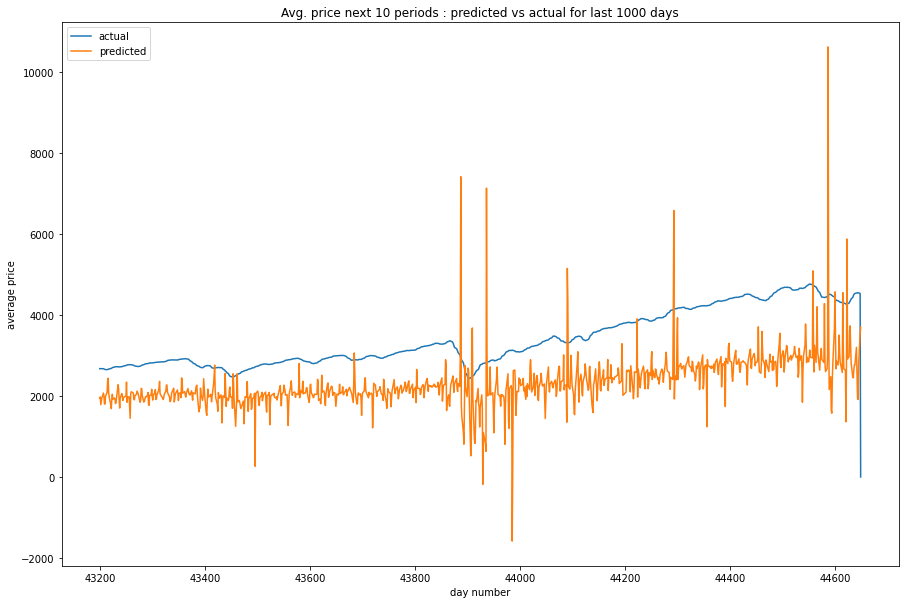

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Avg. price next 10 periods : predicted vs actual for last 1000 days')
plt.plot(days_in_number[-1010:-10], avg_price_next[-1000:], label='actual')
plt.plot(days_in_number[-1010:-10], y_fit_kdegree_next_pred_test[:], label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
print("r2 score {} degree : {}".format(k, r2_score(avg_price_next[-1000:], y_fit_kdegree_next_pred_test[:])))

r2 score 4 degree : -2.3025895482977288


**WHOLE DATA**

In [ ]:
pred1 = model1.predict({"avg_price_params_last": normalized_params_kdegree[:-10], "vol_params_last": normalized_params_kdegree_vol[:-10]})
pred1

array([[-0.09991238, -0.03144006,  0.01419443, ..., -0.00424941,
         0.00394606, -0.01062912],
       [ 0.14972714, -0.8535683 ,  0.51314276, ...,  0.41737223,
        -0.5557358 ,  0.61985815],
       [-0.65038323,  1.7324952 , -0.66668946, ..., -1.3014426 ,
         1.4604285 , -0.6890334 ],
       ...,
       [ 1.1827564 ,  0.33849648,  0.10910817, ..., -0.14252053,
         0.20415351,  0.14817096],
       [ 2.3282623 , -1.9208428 , -1.1680439 , ...,  2.4807565 ,
        -0.8226621 , -2.0468504 ],
       [ 2.5603247 , -2.2778425 , -1.3231767 , ...,  2.9941282 ,
        -1.01035   , -2.2882314 ]], dtype=float32)

In [ ]:
pred1.shape

(5585, 9)

In [ ]:
pred1_final = scaler.inverse_transform(pred1)
pred1_final

array([[ 2.69726660e+03, -7.16126728e+00,  2.41625333e+00, ...,
        -9.62049887e-03,  3.57742727e-01, -5.92946887e-01],
       [ 3.23138452e+03, -2.00923599e+02,  9.97994766e+01, ...,
         8.05847931e+01, -6.58718872e+01,  3.03762760e+01],
       [ 1.51950330e+03,  4.08569733e+02, -1.30476608e+02, ...,
        -2.47972534e+02,  1.72709747e+02, -3.39158325e+01],
       ...,
       [ 5.44160840e+03,  8.00267944e+01,  2.09412308e+01, ...,
        -2.64406185e+01,  2.40491753e+01,  7.20723486e+00],
       [ 7.89248242e+03, -4.52462891e+02, -2.28329437e+02, ...,
         4.75007751e+02, -9.74584579e+01, -1.00611130e+02],
       [ 8.38899316e+03, -5.36601990e+02, -2.58607819e+02, ...,
         5.73140503e+02, -1.19668396e+02, -1.12467644e+02]], dtype=float32)

In [ ]:
y_fit_kdegree_next_pred1 = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next_pred1.append(reversed_func(days_in_number[i+window_size-1],*pred1_final[i]))

y_fit_kdegree_next_pred1 = np.array(y_fit_kdegree_next_pred1)

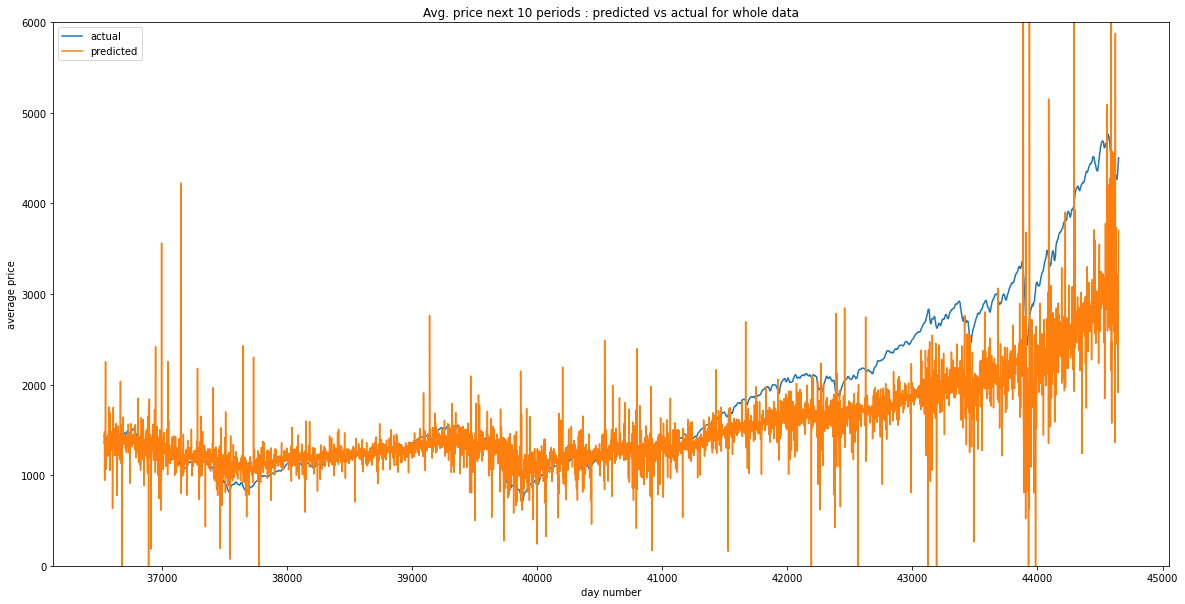

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Avg. price next 10 periods : predicted vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[:-9], label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next_pred1, label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.ylim(0,6000)
plt.legend()
plt.show()

In [ ]:
# mae and r2 score between actual and predicted avg price for next 10 days (k degree)
print("mae for {} degree : {}".format(k, mean_absolute_error(avg_price_next[:-9], y_fit_kdegree_next_pred1)))
print("r2 score for {} degree : {}".format(k, r2_score(avg_price_next[:-9], y_fit_kdegree_next_pred1)))

mae for 4 degree : 375.29037998289607
r2 score for 4 degree : 0.5588771770469576


## USING ONLY COSINES

In [ ]:
# Creating Fourier Function
def make_func_cos(numarg):
    def func(x,*a):
        n= numarg
        s= 0
        for i in range(n):
          if i == 0:
            s = a[i]/2
          else:
            s += a[i]*np.cos(i*x)
        return s
    return func

# Creating Reversed Fourier Function
def reversed_func_cos(x,*a):
  n = len(a)
  s = 0
  for i in range(n):
    if i == 0:
      s = a[i]/2
    else:
      s += a[i]*np.cos(i*x)
  return s

In [ ]:
k = 7

In [ ]:
# k_degree
a = np.zeros(k+1)
params_kdegree = []
for i in range(len(window_last_10_days)):
  params_kdegree.append(curve_fit(make_func_cos(len(a)), window_last_10_days[i], window_last_10_days_avg_price[i], a)[0])

y_fit_kdegree = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree.append(reversed_func_cos(days_in_number[i+window_size-1],*params_kdegree[i]))

params_kdegree = np.array(params_kdegree)
y_fit_kdegree = np.array(y_fit_kdegree)

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price last 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_curr[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], avg_price_curr[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree[:], 'b-', label='fitted')
plt.xlabel('day number')
# plt.xlim(1000, 5000)
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(avg_price_curr[9:], y_fit_kdegree)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_curr[9:], y_fit_kdegree)))

In [ ]:
params_kdegree[0]

#### **VOLUME LAST 10 PERIODS**

In [ ]:
# k_degree
b = np.full(k+1, 1e7)
params_kdegree_vol = []
for i in range(len(window_last_10_days)):
  params_kdegree_vol.append(curve_fit(make_func_cos(len(b)), window_last_10_days[i], window_last_10_days_volume[i], b)[0])

y_fit_kdegree_vol = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree_vol.append(reversed_func_cos(days_in_number[i+window_size-1],*params_kdegree_vol[i]))

params_kdegree_vol = np.array(params_kdegree_vol)
y_fit_kdegree_vol = np.array(y_fit_kdegree_vol)

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Volume : fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], volume[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_vol[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Volume : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], volume[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree_vol[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(volume[9:], y_fit_kdegree_vol)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(volume[9:], y_fit_kdegree_vol)))

In [ ]:
params_kdegree_vol[0]

In [ ]:
y_fit_kdegree_vol = np.floor(y_fit_kdegree_vol)

In [ ]:
y_fit_kdegree_vol[0]

**Avg Price next 10 periods**

In [ ]:
# k_degree
a_next = np.ones(k+1)
params_kdegree_next = []
for i in range(len(window_next_10_days)):
  params_kdegree_next.append(curve_fit(make_func_cos(len(a_next)), window_next_10_days[i], window_next_10_days_avg_price[i], a_next)[0])

y_fit_kdegree_next = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next.append(reversed_func_cos(days_in_number[i+window_size-1],*params_kdegree_next[i]))

params_kdegree_next = np.array(params_kdegree_next)
y_fit_kdegree_next = np.array(y_fit_kdegree_next)

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_next[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_next[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[9:],'r-', label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(avg_price_next[9:], y_fit_kdegree_next)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_next[9:], y_fit_kdegree_next)))

In [ ]:
params_kdegree_next[0]

**Creating Model**

In [ ]:
# normalize the calculated Fourier parameters to be passed as input
scaler = RobustScaler()
normalized_params_kdegree = scaler.fit_transform(params_kdegree)
normalized_params_kdegree.shape

In [ ]:
normalized_params_kdegree[0]

In [ ]:
normalized_params_kdegree_vol = scaler.fit_transform(params_kdegree_vol)
normalized_params_kdegree_vol.shape

In [ ]:
normalized_params_kdegree_vol[0]

In [ ]:
normalized_params_kdegree_next =scaler.fit_transform(params_kdegree_next)
normalized_params_kdegree_next.shape

In [ ]:
normalized_params_kdegree_next[0]

**MODEL : ANN**

In [ ]:
avg_price_params_last = keras.Input(shape=(k+1,), name="avg_price_params_last")
vol_params_last = keras.Input(shape=(k+1,), name="vol_params_last")

In [ ]:
inputs = layers.concatenate([avg_price_params_last, vol_params_last])
outputs = layers.Dense(k+1)(inputs)

In [ ]:
model1 = keras.Model(inputs = [avg_price_params_last, vol_params_last], outputs = outputs)

In [ ]:
keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate = 3e-3),
              loss=keras.losses.MeanAbsoluteError(),
              )

**TEST DATA : Last 1000 days**

In [ ]:
normalized_params_kdegree_next.shape

In [ ]:
avg_price_train = normalized_params_kdegree[:-1010]
avg_price_test = normalized_params_kdegree[-1010:-10]
vol_train = normalized_params_kdegree_vol[:-1010]
vol_test = normalized_params_kdegree_vol[-1010:-10]
avg_price_next_train = normalized_params_kdegree_next[:-1000]
avg_price_next_test = normalized_params_kdegree_next[-1000:]

In [ ]:
history1 = model1.fit(
    {"avg_price_params_last": avg_price_train, "vol_params_last": vol_train},
    avg_price_next_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    shuffle = False
)

In [ ]:
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['loss'], label='train_loss')
plt.legend()

In [ ]:
model1.summary()

In [ ]:
pred_test = model1.predict({"avg_price_params_last": avg_price_test, "vol_params_last": vol_test})
pred_test

In [ ]:
pred_test.shape

In [ ]:
pred_test_final = scaler.inverse_transform(pred_test)

In [ ]:
pred_test_final[0]

In [ ]:
y_fit_kdegree_next_pred_test = []
for i in range(len(window_next_10_days)-1000, len(window_next_10_days)):
  y_fit_kdegree_next_pred_test.append(reversed_func_cos(days_in_number[i+window_size-1],*pred_test_final[i-len(window_next_10_days)+1000]))

y_fit_kdegree_next_pred_test = np.array(y_fit_kdegree_next_pred_test)

In [ ]:
y_fit_kdegree_next_pred_test[0]

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Avg. price next 10 periods : predicted vs actual for last 1000 days')
plt.plot(days_in_number[-1010:-10], avg_price_next[-1000:], label='actual')
plt.plot(days_in_number[-1010:-10], y_fit_kdegree_next_pred_test[:], label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
print("r2 score {} degree : {}".format(k, r2_score(avg_price_next[-1000:], y_fit_kdegree_next_pred_test[:])))

**WHOLE DATA**

In [ ]:
pred1 = model1.predict({"avg_price_params_last": normalized_params_kdegree[:-10], "vol_params_last": normalized_params_kdegree_vol[:-10]})
pred1

In [ ]:
pred1.shape

In [ ]:
pred1_final = scaler.inverse_transform(pred1)
pred1_final

In [ ]:
y_fit_kdegree_next_pred1 = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next_pred1.append(reversed_func_cos(days_in_number[i+window_size-1],*pred1_final[i]))

y_fit_kdegree_next_pred1 = np.array(y_fit_kdegree_next_pred1)

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Avg. price next 10 periods : predicted vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[:-9], label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next_pred1, label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.ylim(0,6000)
plt.legend()
plt.show()

In [ ]:
# mae and r2 score between actual and predicted avg price for next 10 days (k degree)
print("mae for {} degree : {}".format(k, mean_absolute_error(avg_price_next[:-9], y_fit_kdegree_next_pred1)))
print("r2 score for {} degree : {}".format(k, r2_score(avg_price_next[:-9], y_fit_kdegree_next_pred1)))

## USING ONLY SINES

In [ ]:
# Creating Fourier Function
def make_func_sin(numarg):
    def func(x,*a):
        n= numarg
        s= 0
        for i in range(n):
          if i == 0:
            s = a[i]/2
          else:
            s += a[i]*np.sin(i*x)
        return s
    return func

# Creating Reversed Fourier Function
def reversed_func_sin(x,*a):
  n = len(a)
  s = 0
  for i in range(n):
    if i == 0:
      s = a[i]/2
    else:
      s += a[i]*np.sin(i*x)
  return s

In [ ]:
k = 3

In [ ]:
# k_degree
a = np.zeros(k+1)
params_kdegree = []
for i in range(len(window_last_10_days)):
  params_kdegree.append(curve_fit(make_func_sin(len(a)), window_last_10_days[i], window_last_10_days_avg_price[i], a)[0])

y_fit_kdegree = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree.append(reversed_func_sin(days_in_number[i+window_size-1],*params_kdegree[i]))

params_kdegree = np.array(params_kdegree)
y_fit_kdegree = np.array(y_fit_kdegree)

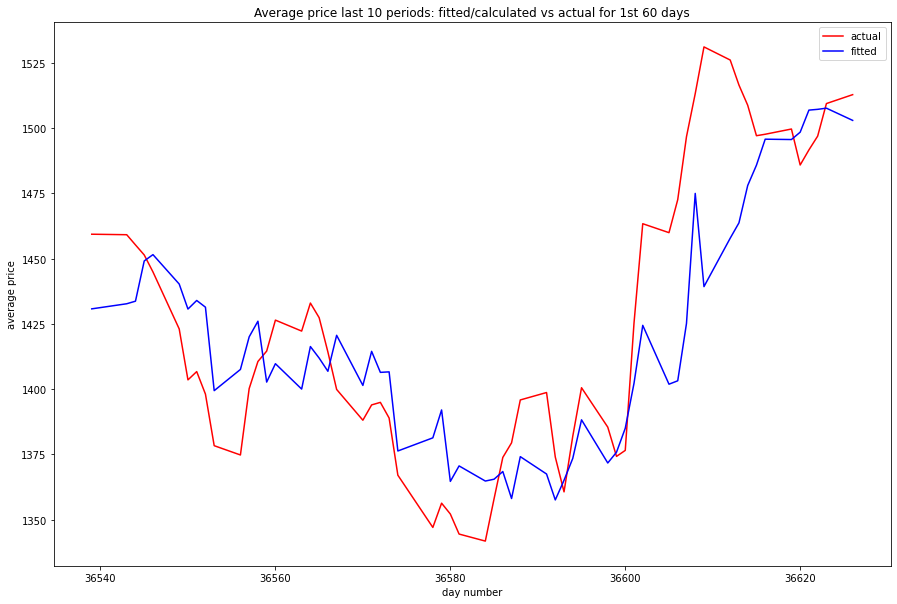

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price last 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_curr[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

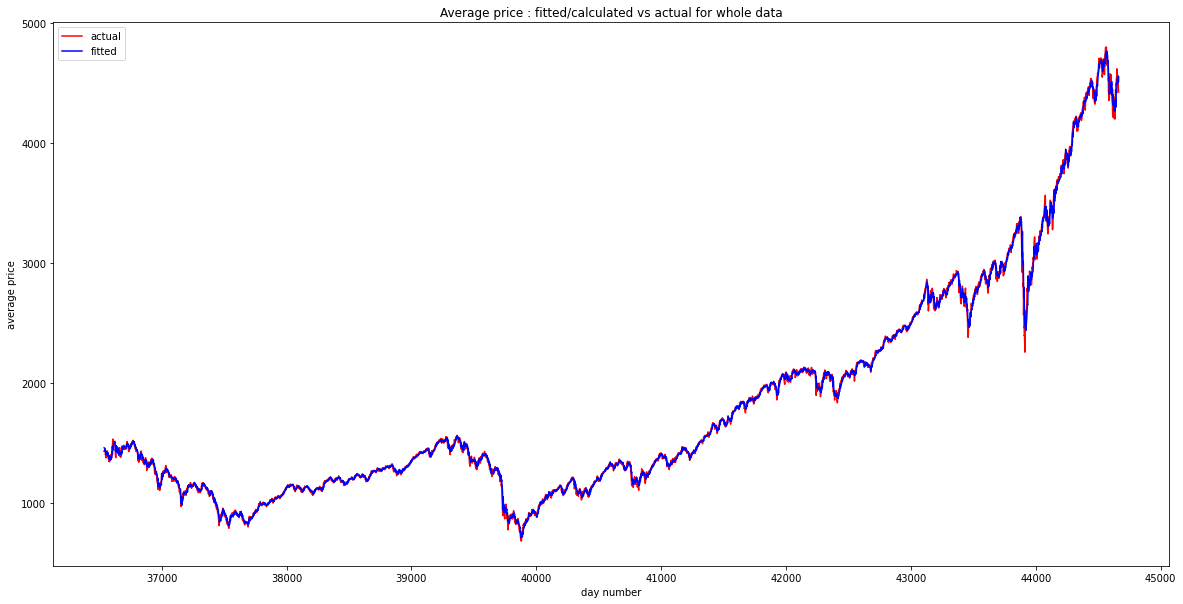

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], avg_price_curr[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree[:], 'b-', label='fitted')
plt.xlabel('day number')
# plt.xlim(1000, 5000)
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(avg_price_curr[9:], y_fit_kdegree)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_curr[9:], y_fit_kdegree)))

mae for 3 degree fitting : 18.071311356214053
r2 score for 3 degree fitting : 0.9990035713280674


In [ ]:
params_kdegree[0]

array([ 2.86870206e+03, -3.86986425e+00,  3.67666690e-01, -4.93164673e-01])

#### **VOLUME LAST 10 PERIODS**

In [ ]:
# k_degree
b = np.full(k+1, 1e7)
params_kdegree_vol = []
for i in range(len(window_last_10_days)):
  params_kdegree_vol.append(curve_fit(make_func_sin(len(b)), window_last_10_days[i], window_last_10_days_volume[i], b)[0])

y_fit_kdegree_vol = []
for i in range(len(window_last_10_days)):
  y_fit_kdegree_vol.append(reversed_func_sin(days_in_number[i+window_size-1],*params_kdegree_vol[i]))

params_kdegree_vol = np.array(params_kdegree_vol)
y_fit_kdegree_vol = np.array(y_fit_kdegree_vol)

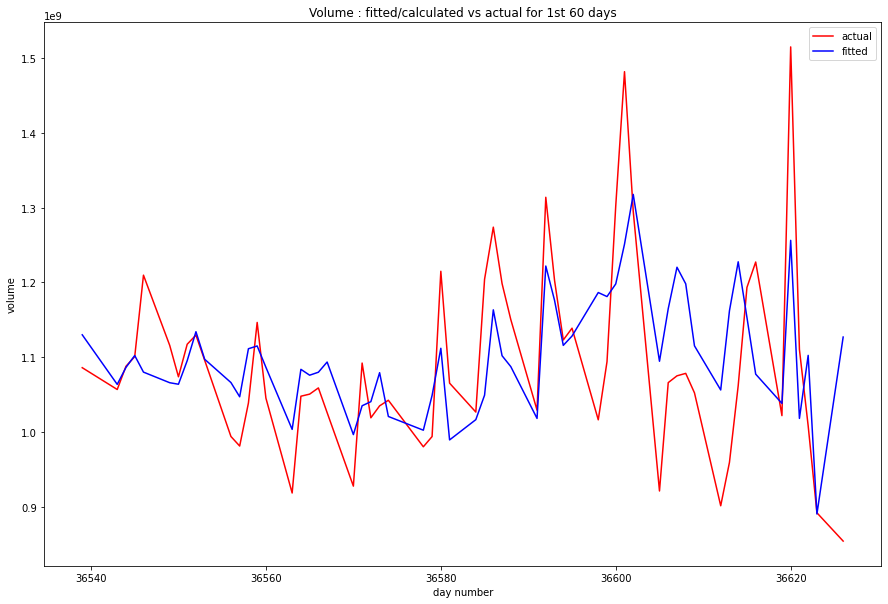

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Volume : fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], volume[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_vol[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

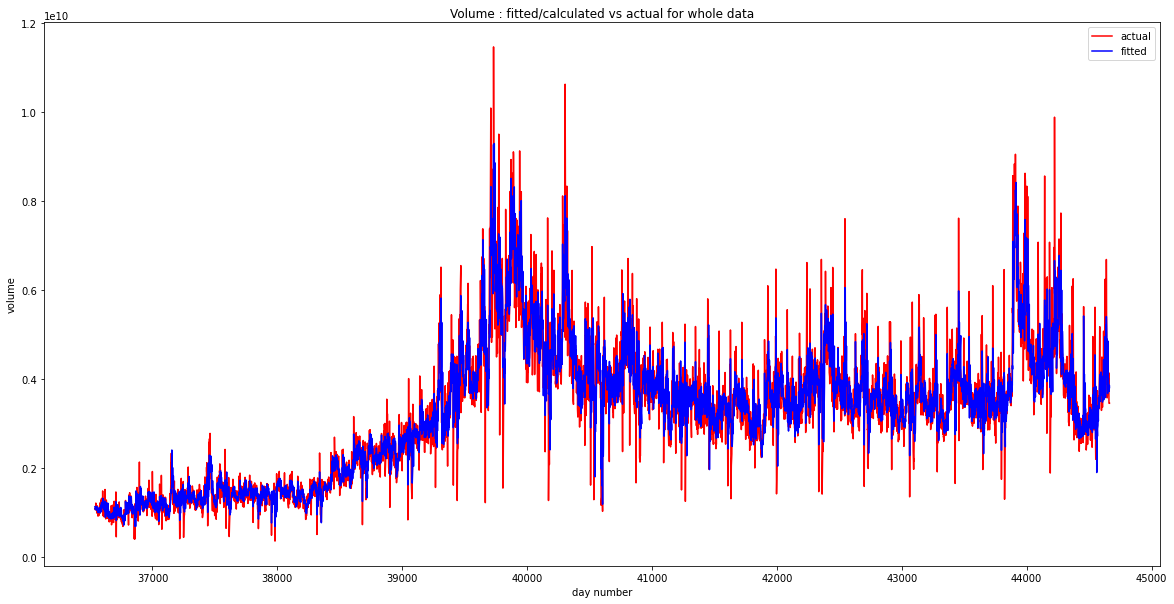

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Volume : fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:], volume[9:],'r-', label='actual')
plt.plot(days_in_number[9:], y_fit_kdegree_vol[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('volume')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(volume[9:], y_fit_kdegree_vol)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(volume[9:], y_fit_kdegree_vol)))

mae for 3 degree fitting : 313788969.3402188
r2 score for 3 degree fitting : 0.8988846220066431


In [ ]:
params_kdegree_vol[0]

array([ 2.10672510e+09,  5.51985291e+07, -3.51534881e+07, -2.37982113e+05])

In [ ]:
y_fit_kdegree_vol = np.floor(y_fit_kdegree_vol)

In [ ]:
y_fit_kdegree_vol[0]

1129937678.0

**Avg Price next 10 periods**

In [ ]:
# k_degree
a_next = np.ones(k+1)
params_kdegree_next = []
for i in range(len(window_next_10_days)):
  params_kdegree_next.append(curve_fit(make_func_sin(len(a_next)), window_next_10_days[i], window_next_10_days_avg_price[i], a_next)[0])

y_fit_kdegree_next = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next.append(reversed_func_sin(days_in_number[i+window_size-1],*params_kdegree_next[i]))

params_kdegree_next = np.array(params_kdegree_next)
y_fit_kdegree_next = np.array(y_fit_kdegree_next)

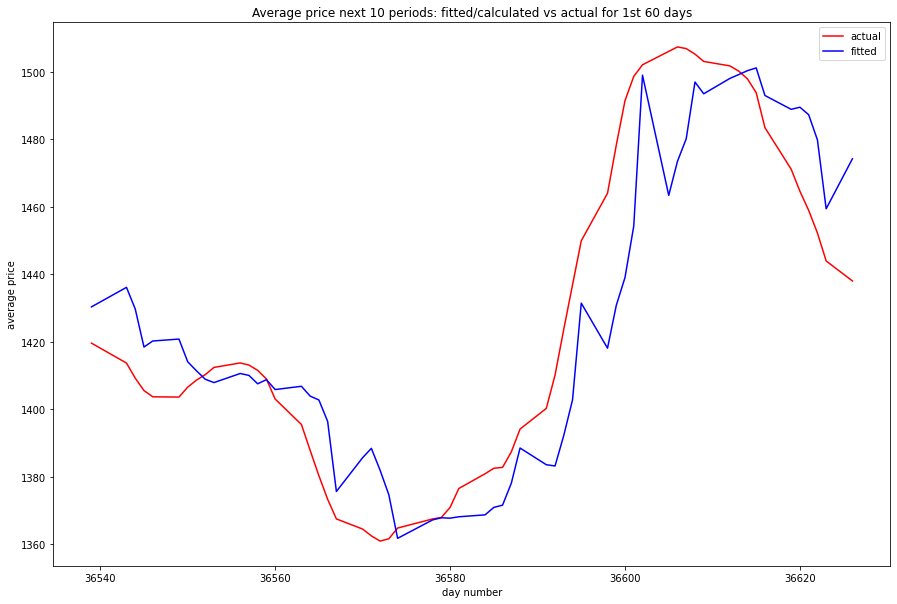

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for 1st 60 days')
plt.plot(days_in_number[9:69], avg_price_next[9:69],'r-', label='actual')
plt.plot(days_in_number[9:69], y_fit_kdegree_next[:60], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

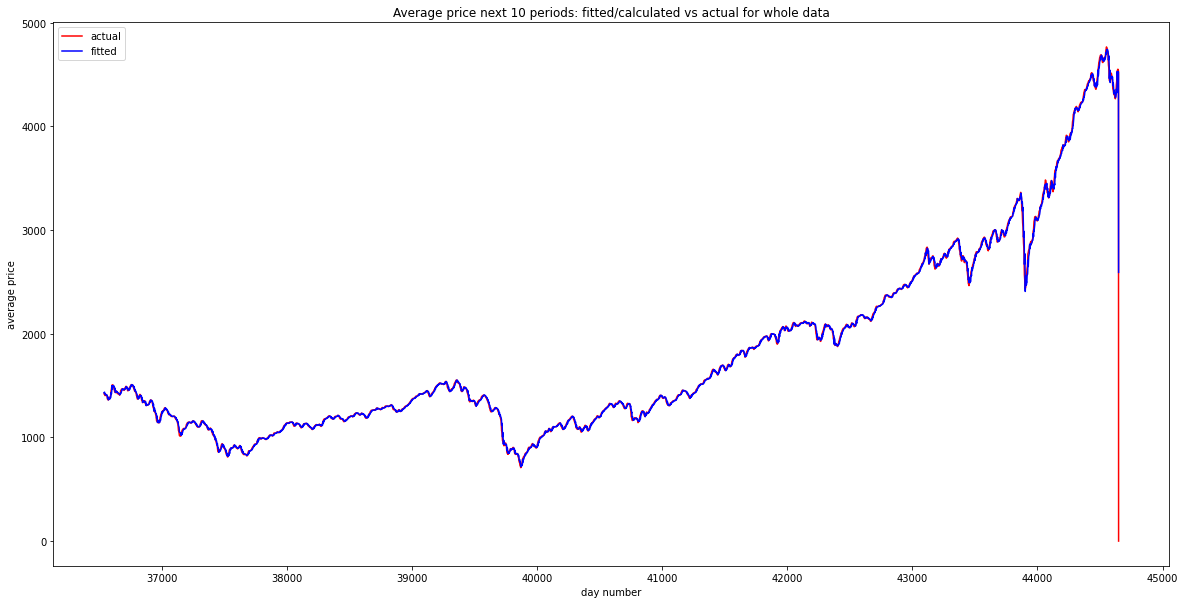

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Average price next 10 periods: fitted/calculated vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[9:],'r-', label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next[:], 'b-', label='fitted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
# Error metrics : mae and r2 score
print('mae for {} degree fitting : {}'.format(k, mean_absolute_error(avg_price_next[9:], y_fit_kdegree_next)))
print('r2 score for {} degree fitting : {}'.format(k, r2_score(avg_price_next[9:], y_fit_kdegree_next)))

mae for 3 degree fitting : 13.787388308955236
r2 score for 3 degree fitting : 0.9979575784331977


In [ ]:
params_kdegree_next[0]

array([ 2.87361026e+03, -3.04725741e+00,  3.43409013e+00, -1.51829705e+00])

**Creating Model**

In [ ]:
# normalize the calculated Fourier parameters to be passed as input
scaler = RobustScaler()
normalized_params_kdegree = scaler.fit_transform(params_kdegree)
normalized_params_kdegree.shape

(5595, 4)

In [ ]:
normalized_params_kdegree[0]

array([ 0.02052429, -0.38946412,  0.08431634, -0.11055389])

In [ ]:
normalized_params_kdegree_vol = scaler.fit_transform(params_kdegree_vol)
normalized_params_kdegree_vol.shape

(5595, 4)

In [ ]:
normalized_params_kdegree_vol[0]

array([-1.1868392 ,  0.20668329, -0.0384969 ,  0.01935653])

In [ ]:
normalized_params_kdegree_next =scaler.fit_transform(params_kdegree_next)
normalized_params_kdegree_next.shape

(5585, 4)

In [ ]:
normalized_params_kdegree_next[0]

array([ 0.02480783, -0.64450199,  0.79519405, -0.52369415])

**MODEL : ANN**

In [ ]:
avg_price_params_last = keras.Input(shape=(k+1,), name="avg_price_params_last")
vol_params_last = keras.Input(shape=(k+1,), name="vol_params_last")

In [ ]:
inputs = layers.concatenate([avg_price_params_last, vol_params_last])
outputs = layers.Dense(k+1)(inputs)

In [ ]:
model1 = keras.Model(inputs = [avg_price_params_last, vol_params_last], outputs = outputs)

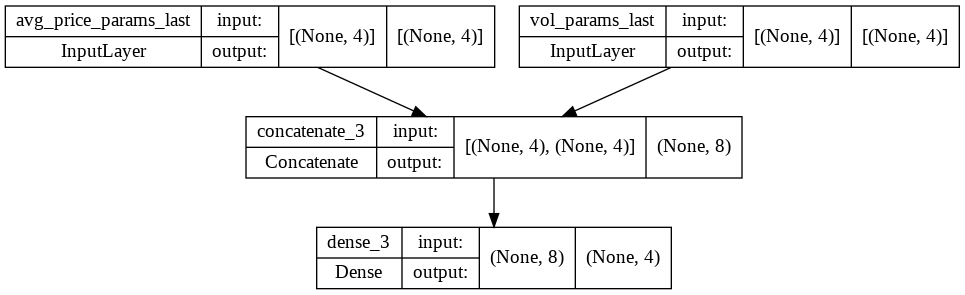

In [ ]:
keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate = 3e-3),
              loss=keras.losses.MeanAbsoluteError(),
              )

**TEST DATA : Last 1000 days**

In [ ]:
normalized_params_kdegree_next.shape

(5585, 4)

In [ ]:
avg_price_train = normalized_params_kdegree[:-1010]
avg_price_test = normalized_params_kdegree[-1010:-10]
vol_train = normalized_params_kdegree_vol[:-1010]
vol_test = normalized_params_kdegree_vol[-1010:-10]
avg_price_next_train = normalized_params_kdegree_next[:-1000]
avg_price_next_test = normalized_params_kdegree_next[-1000:]

In [ ]:
history1 = model1.fit(
    {"avg_price_params_last": avg_price_train, "vol_params_last": vol_train},
    avg_price_next_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    shuffle = False
)

Epoch 1/30
29/29 [==============================] - 0s 6ms/step - loss: 0.8390 - val_loss: 1.0621
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.7609 - val_loss: 0.9840
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6959 - val_loss: 0.9184
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6421 - val_loss: 0.8635
Epoch 5/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5983 - val_loss: 0.8184
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.7819
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.5372 - val_loss: 0.7525
Epoch 8/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5186 - val_loss: 0.7276
Epoch 9/30
29/29 [==============================] - 0s 3ms/step - loss: 0.5057 - val_loss: 0.7042
Epoch 10/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4970 - val_loss: 0.6824
Epoch 11/30
29/29 [

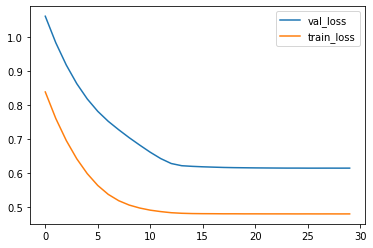

In [ ]:

plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['loss'], label='train_loss')
plt.legend()

In [ ]:
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 avg_price_params_last (InputLa  [(None, 4)]         0           []                               
 yer)                                                                                             
                                                                                                  
 vol_params_last (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 8)            0           ['avg_price_params_last[0][0]',  
                                                                  'vol_params_last[0][0]']        
                                                                                            

In [ ]:
pred_test = model1.predict({"avg_price_params_last": avg_price_test, "vol_params_last": vol_test})
pred_test

array([[ 1.2355443 , -0.1451015 ,  0.20243934,  0.14934932],
       [ 1.2371392 , -0.17088543,  0.19061527,  0.15690584],
       [ 1.2383367 , -0.23806858,  0.21777657,  0.47349074],
       ...,
       [ 3.0914562 ,  2.893374  , -0.46218038,  1.6721246 ],
       [ 3.098559  ,  1.2154839 , -0.1651686 ,  0.9168804 ],
       [ 3.1214905 , -0.11581406,  0.03737332,  0.3951624 ]],
      dtype=float32)

In [ ]:
pred_test.shape

(1000, 4)

In [ ]:
pred_test_final = scaler.inverse_transform(pred_test)

In [ ]:
pred_test_final[0]

array([ 5.2436733e+03, -6.8657100e-01,  8.5287863e-01,  4.1747206e-01],
      dtype=float32)

In [ ]:
y_fit_kdegree_next_pred_test = []
for i in range(len(window_next_10_days)-1000, len(window_next_10_days)):
  y_fit_kdegree_next_pred_test.append(reversed_func_sin(days_in_number[i+window_size-1],*pred_test_final[i-len(window_next_10_days)+1000]))

y_fit_kdegree_next_pred_test = np.array(y_fit_kdegree_next_pred_test)

In [ ]:
y_fit_kdegree_next_pred_test[0]

2620.508460787825

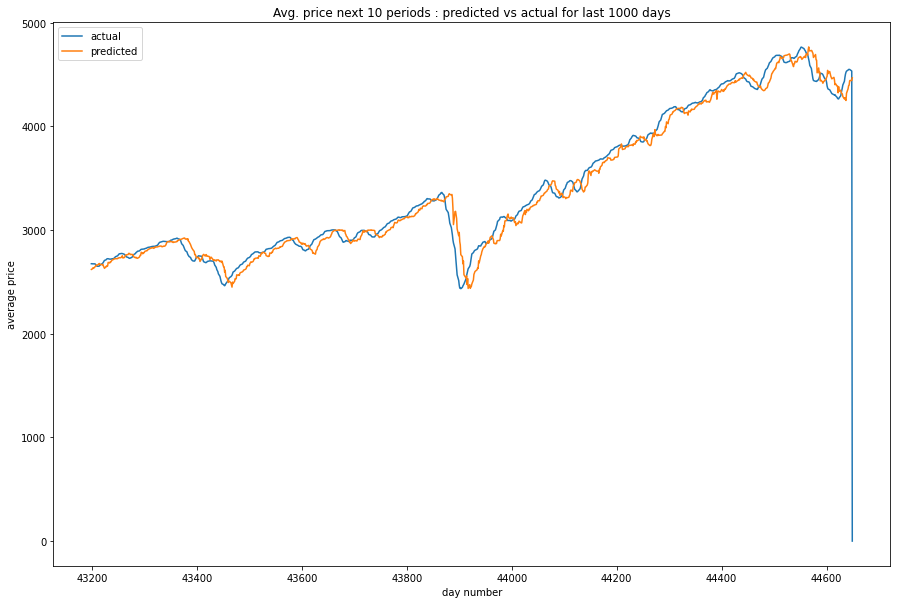

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Avg. price next 10 periods : predicted vs actual for last 1000 days')
plt.plot(days_in_number[-1010:-10], avg_price_next[-1000:], label='actual')
plt.plot(days_in_number[-1010:-10], y_fit_kdegree_next_pred_test[:], label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.legend()
plt.show()

In [ ]:
print("r2 score {} degree : {}".format(k, r2_score(avg_price_next[-1000:], y_fit_kdegree_next_pred_test[:])))

r2 score 3 degree : 0.9382395297532687


**WHOLE DATA**

In [ ]:
pred1 = model1.predict({"avg_price_params_last": normalized_params_kdegree[:-10], "vol_params_last": normalized_params_kdegree_vol[:-10]})
pred1

array([[ 0.03150877, -0.13683051, -0.01065678, -0.05383618],
       [ 0.04478198,  0.13060194, -0.20135948,  0.34498525],
       [ 0.04732775,  0.11966242, -0.12061734,  0.40032402],
       ...,
       [ 3.0914562 ,  2.893374  , -0.46218038,  1.6721246 ],
       [ 3.098559  ,  1.2154839 , -0.16516861,  0.91688037],
       [ 3.1214905 , -0.11581406,  0.0373733 ,  0.3951624 ]],
      dtype=float32)

In [ ]:
pred1.shape

(5585, 4)

In [ ]:
pred1_final = scaler.inverse_transform(pred1)
pred1_final

array([[ 2.8867275e+03, -6.4747369e-01, -7.5070411e-02, -1.6691844e-01],
       [ 2.9127104e+03,  6.1669040e-01, -9.0550494e-01,  9.8014897e-01],
       [ 2.9176938e+03,  5.6497878e-01, -5.5390501e-01,  1.1393111e+00],
       ...,
       [ 8.8766914e+03,  1.3676426e+01, -2.0412765e+00,  4.7971916e+00],
       [ 8.8905957e+03,  5.7449713e+00, -7.4790812e-01,  2.6250010e+00],
       [ 8.9354854e+03, -5.4812807e-01,  1.3408154e-01,  1.1244656e+00]],
      dtype=float32)

In [ ]:
y_fit_kdegree_next_pred1 = []
for i in range(len(window_next_10_days)):
  y_fit_kdegree_next_pred1.append(reversed_func_sin(days_in_number[i+window_size-1],*pred1_final[i]))

y_fit_kdegree_next_pred1 = np.array(y_fit_kdegree_next_pred1)

In [ ]:
from google.colab import files

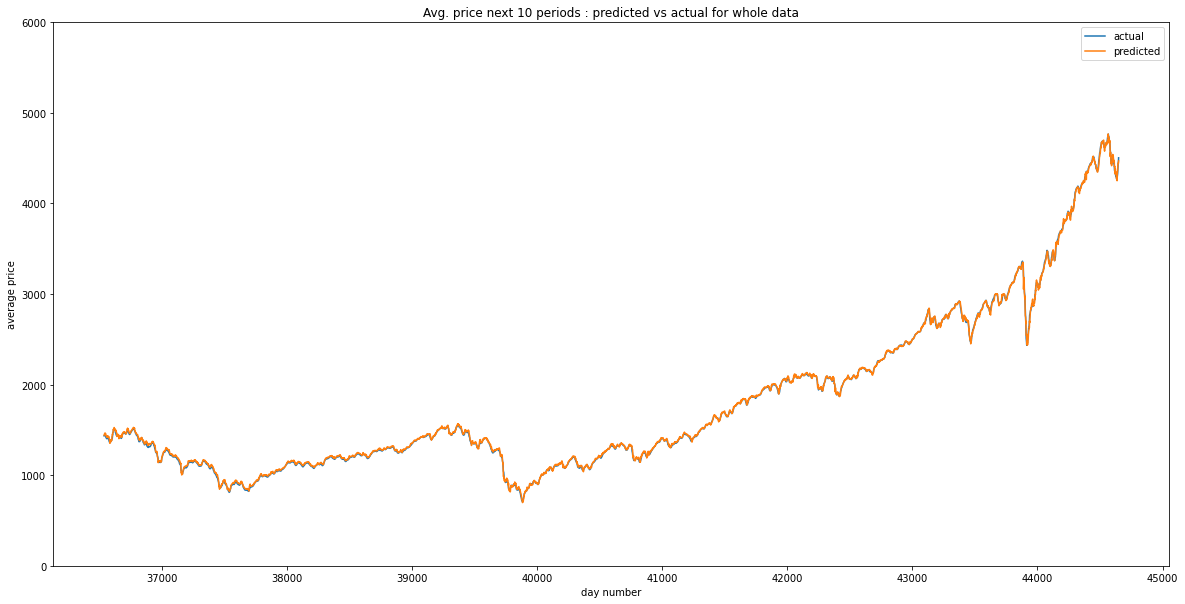

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Avg. price next 10 periods : predicted vs actual for whole data')
plt.plot(days_in_number[9:-10], avg_price_next[:-9], label='actual')
plt.plot(days_in_number[9:-10], y_fit_kdegree_next_pred1, label='predicted')
plt.xlabel('day number')
plt.ylabel('average price')
plt.ylim(0,6000)
plt.legend()
plt.savefig("img.png")
plt.show()

In [ ]:
# files.download("img.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# mae and r2 score between actual and predicted avg price for next 10 days (k degree)
print("mae for {} degree : {}".format(k, mean_absolute_error(avg_price_next[:-9], y_fit_kdegree_next_pred1)))
print("r2 score for {} degree : {}".format(k, r2_score(avg_price_next[:-9], y_fit_kdegree_next_pred1)))

mae for 3 degree : 10.513967477019392
r2 score for 3 degree : 0.9997575799147206


##The API

In [ ]:
!pip install flask_restful

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.5 MB/s 


In [ ]:
from flask import Flask, jsonify, request
from flask_restful import Resource, Api, reqparse

In [ ]:
app = Flask(__name__)
api = Api(app)

In [ ]:
class Fourier(Resource):
  def get(self):
    ftype = request.args.get('ftype')
    deg = request.args.get('deg')
    return jsonify({'ftype': ftype, 'deg': deg})

In [ ]:
api.add_resource(Fourier, '/fourier')

In [ ]:
if __name__ == '__main__':
  app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
